In [2]:
import seaborn as sns  
import matplotlib.pyplot as plt  
import pandas as pd 
from tqdm import tqdm  
import os 
import statsmodels.api as sm  
import numpy as np

In [3]:
gut=[
'麦胶蛋白抗体'
,'组织转麸胺酶抗体'
,'分泌型免疫球蛋白'
,'钙卫蛋白'
,'解连蛋白'
,'葡萄糖醛酸酶'
,'胰弹性蛋白酶']

gut_english = ['Anti-gliadin slgA', 'Anti-htTG slgA', 
       'slgA', 'Calprotectin', 'Zonulin', 
       'Beta-Glucuronidase', 'Pancreatic Elastase']

organic_acid=['尿肌酐-1073'
,'46. 阿拉伯糖醇'
,'45. 酒石酸'
,'44. 柠苹酸'
,'43. 丙三羧酸'
,'42. 二羟基苯丙酸'
,'41. 吲哚乙酸'
,'40. 4-羟基苯乙酸'
,'39. 4-羟基苯甲酸'
,'38. 苯丙酸'
,'37. 苯乙酸'
,'36. 马尿酸'
,'35. 苯甲酸'
,'34. 乳清酸'
,'33. 焦谷氨酸'
,'32. α-羟丁酸'
,'31. 葡萄糖二酸'
,'30. 苯基乙醛酸'
,'29. 杏仁酸'
,'28. 2-甲基马尿酸'
,'1. 己二酸'
,'2. 辛二酸'
,'3. 乙基丙二酸'
,'4. 丙酮酸'
,'5. 乳酸'
,'6. β-羟基丁酸'
,'7. 柠檬酸'
,'8. 顺式乌头酸'
,'9. 异柠檬酸'
,'10. α-酮戊二酸'
,'11. 琥珀酸'
,'12. 富马酸'
,'13. 苹果酸'
,'14. 羟甲基戊二酸'
,'15. α-酮异戊酸'
,'16. α-酮异己酸'
,'17. α-酮-β-甲基戊酸'
,'18. 黄尿酸'
,'19. β-羟基异戊酸'
,'20. 甲基丙二酸'
,'22. 高香草酸'
,'23. 香草基扁桃酸'
,'24. 5-羟吲哚乙酸'
,'25. 犬尿喹啉酸'
,'26. 吡啶甲酸'
,'27. 喹啉酸'
,'21. 亚胺甲基谷氨酸'
]

organic_acid_english = ['Urinary creatinine', 'Arabitol', 'Tartaric acid', 'Citric acid',
                 'Tricarboxylic acid', 'Dihydroxyphenylacetic acid', 'Indole-3-acetic acid',
                 '4-Hydroxyphenylacetic acid', '4-Hydroxybenzoic acid', 'Phenylpropanoic acid',
                 'Phenylacetic acid', 'Hippuric acid', 'Benzoic acid', 'Lactic acid',
                 'Fumaric acid', 'α-Hydroxybutyric acid', 'Glucaric acid',
                 'Phenylacetaldehyde acid', 'Mandelic acid', '2-Methylhippuric acid',
                 'Hexanedioic acid', 'Octanedioic acid', 'Ethylmalonic acid',
                 'Pyruvic acid', 'Lactic acid', 'β-Hydroxybutyric acid',
                 'Citric acid', 'Cis-aconitic acid', 'Isocitric acid',
                 'α-Ketoglutaric acid', 'Succinic acid', 'Fumaric acid',
                 'Malic acid', 'Hydroxymethyl glutaric acid',
                 'α-Ketoisovaleric acid', 'α-Ketoisocaproic acid',
                 'α-Keto-β-methylvaleric acid', 'Uric acid',
                 'β-Hydroxyisovaleric acid', 'Methylmalonic acid',
                 'Vanillic acid', 'Vanilloylmandelic acid',
                 '5-Hydroxyindole-3-acetic acid', 'Kynurenic acid',
                 'Pyridinecarboxylic acid', 'Quinolinic acid',
                 'Imidazole methyl glutamic acid']

cytokine=['干扰素α'
,'肿瘤坏死因子'
,'干扰素γ'
,'白介素12'
,'白介素1β'
,'白介素17'
,'白介素10'
,'白介素8'
,'白介素6'
,'白介素5'
,'白介素4'
,'白介素2'
]

cytokine_english = [
    'IFN-α', 'TNF', 'IFN-γ',
    'IL-12', 'IL-1β', 'IL-17',
    'IL-10', 'IL-8', 'IL-6',
    'IL-5', 'IL-4', 'IL-2'
]

oxidative=[
'8-羟基脱氧鸟苷'
,'丙二醛'
,'谷胱甘肽'
,'含硫化合物'
,'谷胱甘肽硫转移酶'
,'谷胱甘肽过氧化物酶'
,'超氧化物歧化酶'
,'花生四烯酸过氧化物'
,'硝化酪氨酸']


oxidative_english = [
    '8-OHdG', 
    'MDA', 
    't-GSH', 
    'f-Thiol', 
    'GSTs', 
    'GSHPx', 
    'SOD',  
    'F2-losPs', 
    'Nitrotyrosine'  
]

Hormone=[
'三氯沙'
,'双酚A'
,'单甲基酯'
,'单乙基酯'
,'单丁基酯'
,'单苄基酯'
,'单乙基己基酯'
,'甲酯'
,'乙酯'
,'丙酯'
,'丁酯'
,'壬基苯酯'
,'辛基苯酯'
,'丁基苯酯'
]

Hormone_english = ['Triclosan', 'Bisphenol A', 'Monomethyl ester', 'Monoethyl ester', 'Monobutyl ester', 'Monobenzyl ester', 
            'Monooctyl ester', 'Methyl ester', 'Ethyl ester', 'Propyl ester', 'Butyl ester', 
            'Nonylphenol ester', 'Octylphenol ester', 'Butylphenol ester']

foodallergy=['牛奶'
,'玉米'
,'虾'
,'鳕鱼'
,'猪肉'
,'羊肉'
,'鸡肉'
,'牛肉'
,'蛋黄'
,'蛋白'
,'羊奶'
,'芒果'
,'香蕉'
,'苹果'
,'番茄'
,'土豆'
,'韭菜'
,'芹菜'
,'花生'
,'大豆/毛豆'
,'小麦'
,'鳗鱼'
,'鱿鱼'
,'蛤'
,'蟹'
,'鲍鱼'
,'鸭肉'
,'酸奶'
,'巧达芝士'
,'菠萝'
,'薏仁'
,'燕麦'
,'米'
,'麸质'
,'荞麦'
,'金枪鱼'
,'鱼翅'
,'鲑鱼'
,'牡蛎'
,'海带'
,'生姜'
,'大蒜'
,'辣椒'
,'可可豆'
,'芝麻'
,'核桃'
,'杏仁'
,'葵花籽'
,'绿豆'
,'花豆'
,'包心菜'
,'绿花椰菜'
,'竹笋'
,'芦笋'
,'茶'
,'咖啡'
,'香草'
,'蜂蜜'
,'酵母'
,'胡椒'
,'菠菜'
,'青椒/彩椒'
,'豌豆'
,'洋葱'
,'莴苣'
,'青葱'
,'茄子'
,'小黄瓜'
,'白花椰菜'
,'胡萝卜'
,'龙眼/桂圆'
,'柠檬'
,'奇异果'
,'番石榴'
,'葡萄柚'
,'葡萄'
,'蘑菇'
,'芋头'
,'地瓜'
,'四季豆'
,'酪梨'
,'椰子'
,'西瓜'
,'草莓'
,'樱桃'
,'梨子'
,'桃子'
,'木瓜'
,'柑橘类'
,'橄榄'
,'免疫球蛋白E'
            ]

foodallergy_english= ['Milk', 'Corn', 'Shrimp', 'Cod', 'Pork', 'Lamb', 'Chicken', 'Beef', 'Egg yolk', 'Egg white', 
                'Sheep milk', 'Mango', 'Banana', 'Apple', 'Tomato', 'Potato', 'Garlic chives', 
                'Celery', 'Peanut', 'Soybean/Edamame', 'Wheat', 'Eel', 'Squid', 'Clam', 'Crab', 
                'Abalone', 'Duck', 'Yogurt', 'Cheddar cheese', 'Pineapple', 'Coixseed', 
                'Oats', 'Rice', 'Gluten', 'Buckwheat', 'Tuna', 'Shark fin', 'Salmon', 'Oyster', 
                'Kelp', 'Ginger', 'Garlic', 'Chili', 'Cocoa bean', 'Sesame', 'Walnut', 
                'Almond', 'Sunflower seed', 'Mung bean', 'Scarlet runner bean', 'Cabbage', 
                'Broccoli', 'Bamboo shoots', 'Asparagus', 'Tea', 'Coffee', 'Vanilla', 
                'Honey', 'Yeast', 'Pepper', 'Spinach', 'Bell pepper', 'Pea', 'Onion', 
                'Lettuce', 'Green onion', 'Eggplant', 'Cucumber', 'Cauliflower', 'Carrot', 
                'Longan', 'Lemon', 'Kiwi', 'Guava', 'Grapefruit', 'Grape', 'Mushroom', 
                'Taro', 'Sweet potato', 'Green bean', 'Avocado', 'Coconut', 'Watermelon', 
                'Strawberry', 'Cherry', 'Pear', 'Peach', 'Papaya', 'Citrus fruits', 
                'Olive', 'Immunoglobulin E']

VD=['维生素D'
,'维生素D3'
,'维生素D2']

VD_english=['Vitamin D', 'Vitamin D3', 'Vitamin D2']


eng_chi_dict=dict(zip(gut+organic_acid+cytokine+oxidative+foodallergy+VD+Hormone
,gut_english+organic_acid_english+cytokine_english+oxidative_english+foodallergy_english+VD_english+Hormone_english))

In [4]:
csv_path='/home2/zhenglijing/work/annovar/data.csv'  
df_alldata = pd.read_csv(csv_path,encoding="GB2312")  
df_alldata

,检测项目,检测套餐,性别,病历号,年龄,结果数据,结果说明
0,尿肌酐-1073,全套有机酸代谢分析(尿液),女,ASD_B22,5,118.9,正常
1,46. 阿拉伯糖醇,全套有机酸代谢分析(尿液),女,ASD_B22,5,54.67,正常
2,45. 酒石酸,全套有机酸代谢分析(尿液),女,ASD_B22,5,3.06,偏高
3,44. 柠苹酸,全套有机酸代谢分析(尿液),女,ASD_B22,5,3.07,正常
4,43. 丙三羧酸,全套有机酸代谢分析(尿液),女,ASD_B22,5,2.43,偏高
...,...,...,...,...,...,...,...
7918,解连蛋白,肠道功能健康评估（粪便）,男,ASD_076,7,254,偏高
7919,钙卫蛋白,肠道功能健康评估（粪便）,男,ASD_076,7,208,偏高
7920,分泌型免疫球蛋白,肠道功能健康评估（粪便）,男,ASD_076,7,2977,偏高
7921,组织转麸胺酶抗体,肠道功能健康评估（粪便）,男,ASD_076,7,629,偏高


In [5]:
folder_path = '/home2/zhenglijing/work/bigwig/276depth>=10.csv'
dfall=pd.read_csv(folder_path,index_col=0)


In [6]:
path='Allchip_ORmodif_vaf>0.1.csv'
dfresultR=pd.read_csv(path,index_col=0)
dfresultR=dfresultR.reset_index()

In [7]:
dfresultR

,level_0,OR,LCI,HCI,index,gene2_formatted
0,chr1-664468-664468-G-T-LOC100133331,4.500000,2.407454,8.411375,chr1-664468-664468-G-T-LOC100133331,chr1:g.664468G>T
1,chr1-16918255-16918255-A-C-NBPF1,3.800000,2.445964,5.903604,chr1-16918255-16918255-A-C-NBPF1,chr1:g.16918255A>C
2,chr1-16969246-16969246-G-A-CROCCP2,3.156250,2.120797,4.697250,chr1-16969246-16969246-G-A-CROCCP2,chr1:g.16969246G>A
3,chr1-16969246-16969246-G-A-MST1P2,3.156250,2.120797,4.697250,chr1-16969246-16969246-G-A-MST1P2,chr1:g.16969246G>A
4,chr1-16973606-16973606-G-T-MST1P2,2.608696,1.857005,3.664661,chr1-16973606-16973606-G-T-MST1P2,chr1:g.16973606G>T
...,...,...,...,...,...,...
281,chr2-107042610-107042610-G-T-RGPD3,9.000000,1.140243,71.037508,chr2-107042610-107042610-G-T-RGPD3,chr2:g.107042610G>T
282,chrY-16952347-16952347-T-C-NLGN4Y,8.000000,1.000586,63.962519,chrY-16952347-16952347-T-C-NLGN4Y,chrY:g.16952347T>C
283,chr1-152284377-152284377-G-A-FLG,16.000000,2.121883,120.647534,chr1-152284377-152284377-G-A-FLG,chr1:g.152284377G>A
284,chr12-64216816-64216816-A-C-MIR10527,5.250000,1.802149,15.294237,chr12-64216816-64216816-A-C-MIR10527,chr12:g.64216816A>C


In [8]:
all_gene_set = set(dfresultR['index'])

In [9]:
alldata_pivot=df_alldata[['检测项目','病历号','结果数据']].pivot_table(index='病历号', columns='检测项目', values='结果数据',aggfunc='sum')

In [10]:
alldata_pivot

检测项目,1. 己二酸,10. α-酮戊二酸,11. 琥珀酸,12. 富马酸,13. 苹果酸,14. 羟甲基戊二酸,15. α-酮异戊酸,16. α-酮异己酸,17. α-酮-β-甲基戊酸,18. 黄尿酸,...,鱿鱼,鲍鱼,鲑鱼,鳕鱼,鳗鱼,鸡肉,鸭肉,麦胶蛋白抗体,麸质,龙眼/桂圆
病历号,,,,,,,,,,,,,,,,,,,,,
ASD_051,1.87,33.93,6.95,0.37,0.63,10.62,0.47,0.24,0.68,0.9,...,47.1,18.2,24.6,31.4,41.3,33.5,32.4,22.8,135,17.9
ASD_052,2.77,20.57,7.8,0.41,0.99,9.85,0.45,0.34,0.49,0.24,...,45.3,34.7,39.2,36.5,40.7,38,41,165,124,46.2
ASD_053,2.38,7.64,7.58,0.22,0.36,9.21,0.32,0.22,0.44,0.51,...,33.4,30.5,23.5,33,36,33.5,44.6,69.4,285,30
ASD_054,1.35,7.81,5.75,0.39,0.27,6.66,0.32,0.19,0.55,0.16,...,49.2,24.7,23.4,31,45,31.5,42.9,81.8,289,39
ASD_055,2.57,16.94,12.35,0.47,0.54,10.66,0.35,0.24,0.66,0.34,...,42.7,34.4,41.6,39,39.5,84.4,38.5,82.6,171,36.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TD_085,1.04,20.93,3.58,0.55,0.76,3.82,0.48,0.21,0.98,0.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118,NaN,NaN
TD_086,1.42,7.87,1.79,0.26,0.51,4.25,0.31,0.28,0.93,0.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,NaN
TD_087,4.54,21.94,13.79,0.58,0.92,10.99,0.75,0.31,1.15,0.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.5,NaN,NaN


In [11]:
alldata_pivot=alldata_pivot.replace('/','0').astype(float)

In [12]:
alldata_pivot=alldata_pivot.reset_index()

In [13]:
number_type_df=pd.read_csv("number_type",index_col=0)
number_type_dict=dict(zip(number_type_df['1'],number_type_df['0']))
number_type_dict

{'TD_076': 'CM202304270033',
 'TD_086': 'CM202304270037',
 'ASD_B04': 'CM202304160101',
 'TD_075': 'CM202304270032',
 'ASD_B34': 'CM202304250147',
 'TD_085': 'CM202304260059',
 'ASD_B16': 'CM202304160110',
 'TD_071': 'CM202304260061',
 'TD_079': 'CM202304270036',
 'ASD_051': 'CM202304230077',
 'ASD_066': 'CM202304260014',
 'TD_087': 'CM202304270038',
 'ASD_B40': 'CM202304160103',
 'ASD_073': 'CM202304270029',
 'ASD_068': 'CM202304250139',
 'TD_053': 'CM202304250140',
 'TD_062': 'CM202304260004',
 'TD_058': 'CM202304250135',
 'ASD_064': 'CM202304270026',
 'ASD_B26': 'CM202304250141',
 'TD_066': 'CM202304260005',
 'TD_064': 'CM202304250133',
 'ASD_B19': 'CM202304160116',
 'ASD_060': 'CM202304260013',
 'ASD_B10': 'CM202304250137',
 'ASD_078': 'CM202304270228',
 'ASD_B30': 'CM202304250138',
 'ASD_B31': 'CM202304250146',
 'TD_063': 'CM202304260015',
 'ASD_B07': 'CM202304160107',
 'ASD_057': 'CM202304270023',
 'TD_073': 'CM202304260008',
 'TD_072': 'CM202304260062',
 'ASD_077': 'CM2023042501

In [14]:
alldata_pivot['number']=alldata_pivot['病历号'].map(number_type_dict)

In [15]:
alldata_pivot.head(2)

检测项目,病历号,1. 己二酸,10. α-酮戊二酸,11. 琥珀酸,12. 富马酸,13. 苹果酸,14. 羟甲基戊二酸,15. α-酮异戊酸,16. α-酮异己酸,17. α-酮-β-甲基戊酸,...,鲍鱼,鲑鱼,鳕鱼,鳗鱼,鸡肉,鸭肉,麦胶蛋白抗体,麸质,龙眼/桂圆,number
0,ASD_051,1.87,33.93,6.95,0.37,0.63,10.62,0.47,0.24,0.68,...,18.2,24.6,31.4,41.3,33.5,32.4,22.8,135.0,17.9,CM202304230077
1,ASD_052,2.77,20.57,7.80,0.41,0.99,9.85,0.45,0.34,0.49,...,34.7,39.2,36.5,40.7,38.0,41.0,165.0,124.0,46.2,CM202304270022


In [16]:
dfall.head()

,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,...,EUR.sites.2015_08,EAS.sites.2015_08,p_value,vaf,typeA,age,number,type,combine,depth
0,chr1,14815,14815,C,T,ncRNA_exonic,WASH7P,.,.,.,...,.,0,5.653146e-08,0.095238,ASD_B26,5.0,CM202304250141,ASD,chr1-14815-14815-C-T-WASH7P,56.0
1,chr1,664468,664468,G,T,ncRNA_exonic,LOC100133331,.,.,.,...,.,0,9.105206e-04,0.160000,ASD_B26,5.0,CM202304250141,ASD,chr1-664468-664468-G-T-LOC100133331,57.0
2,chr1,12907620,12907620,A,G,exonic,HNRNPCL1,.,synonymous SNV,"HNRNPCL3:NM_001146181:exon1:c.T523C:p.L175L,HN...",...,.,0,1.378210e-63,0.024194,ASD_B26,5.0,CM202304250141,ASD,chr1-12907620-12907620-A-G-HNRNPCL1,244.0
3,chr1,12907620,12907620,A,G,exonic,HNRNPCL3,.,synonymous SNV,"HNRNPCL3:NM_001146181:exon1:c.T523C:p.L175L,HN...",...,.,0,1.378210e-63,0.024194,ASD_B26,5.0,CM202304250141,ASD,chr1-12907620-12907620-A-G-HNRNPCL3,244.0
4,chr1,12907620,12907620,A,G,exonic,HNRNPCL4,.,synonymous SNV,"HNRNPCL3:NM_001146181:exon1:c.T523C:p.L175L,HN...",...,.,0,1.378210e-63,0.024194,ASD_B26,5.0,CM202304250141,ASD,chr1-12907620-12907620-A-G-HNRNPCL4,244.0


In [18]:
for i in tqdm(all_gene_set):
    mutls=list(dfall[dfall['combine']==i]['number'])
    alldata_pivot[i]='nonmutant'
    alldata_pivot.loc[  alldata_pivot[alldata_pivot['number'].isin(mutls)].index  , i] ='mut'

100%|██████████| 286/286 [00:00<00:00, 313.26it/s]


In [19]:
alldata_pivot

检测项目,病历号,1. 己二酸,10. α-酮戊二酸,11. 琥珀酸,12. 富马酸,13. 苹果酸,14. 羟甲基戊二酸,15. α-酮异戊酸,16. α-酮异己酸,17. α-酮-β-甲基戊酸,...,chr2-85570186-85570186-G-A-RETSAT,chr6-58776645-58776645-A-C-NONE,chr2-114353282-114353282-G-T-WASH2P,chr1-16363158-16363158-G-A-CLCNKB,chr17-36353452-36353452-C-T-NPEPPSP1,chr7-76796928-76796928-A-G-CCDC146,chr16-70163825-70163825-G-C-PDPR,chr2-91766609-91766609-G-A-LOC107985911,chr1-17014940-17014940-C-T-ESPNP,chr1-145281203-145281203-G-A-NOTCH2NLR
0,ASD_051,1.87,33.93,6.95,0.37,0.63,10.62,0.47,0.24,0.68,...,nonmutant,nonmutant,nonmutant,nonmutant,mut,mut,nonmutant,nonmutant,nonmutant,nonmutant
1,ASD_052,2.77,20.57,7.80,0.41,0.99,9.85,0.45,0.34,0.49,...,nonmutant,nonmutant,mut,nonmutant,mut,nonmutant,mut,nonmutant,nonmutant,nonmutant
2,ASD_053,2.38,7.64,7.58,0.22,0.36,9.21,0.32,0.22,0.44,...,nonmutant,nonmutant,nonmutant,nonmutant,mut,nonmutant,nonmutant,nonmutant,nonmutant,mut
3,ASD_054,1.35,7.81,5.75,0.39,0.27,6.66,0.32,0.19,0.55,...,mut,nonmutant,nonmutant,nonmutant,mut,mut,nonmutant,nonmutant,nonmutant,nonmutant
4,ASD_055,2.57,16.94,12.35,0.47,0.54,10.66,0.35,0.24,0.66,...,nonmutant,nonmutant,mut,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,TD_085,1.04,20.93,3.58,0.55,0.76,3.82,0.48,0.21,0.98,...,nonmutant,nonmutant,mut,nonmutant,nonmutant,mut,nonmutant,nonmutant,nonmutant,mut
65,TD_086,1.42,7.87,1.79,0.26,0.51,4.25,0.31,0.28,0.93,...,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,mut,mut,nonmutant,nonmutant,nonmutant
66,TD_087,4.54,21.94,13.79,0.58,0.92,10.99,0.75,0.31,1.15,...,nonmutant,nonmutant,nonmutant,nonmutant,mut,mut,mut,nonmutant,nonmutant,nonmutant
67,TD_088,1.13,16.98,15.91,0.71,0.86,5.86,0.45,0.24,0.98,...,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,mut,nonmutant,nonmutant,nonmutant,nonmutant


In [20]:
alldata_pivot['type'] = alldata_pivot['病历号'].apply(lambda x: 'ASD' if 'ASD' in x else ('TD' if 'TD' in x else '其他'))

In [21]:
alldata_pivot

检测项目,病历号,1. 己二酸,10. α-酮戊二酸,11. 琥珀酸,12. 富马酸,13. 苹果酸,14. 羟甲基戊二酸,15. α-酮异戊酸,16. α-酮异己酸,17. α-酮-β-甲基戊酸,...,chr6-58776645-58776645-A-C-NONE,chr2-114353282-114353282-G-T-WASH2P,chr1-16363158-16363158-G-A-CLCNKB,chr17-36353452-36353452-C-T-NPEPPSP1,chr7-76796928-76796928-A-G-CCDC146,chr16-70163825-70163825-G-C-PDPR,chr2-91766609-91766609-G-A-LOC107985911,chr1-17014940-17014940-C-T-ESPNP,chr1-145281203-145281203-G-A-NOTCH2NLR,type
0,ASD_051,1.87,33.93,6.95,0.37,0.63,10.62,0.47,0.24,0.68,...,nonmutant,nonmutant,nonmutant,mut,mut,nonmutant,nonmutant,nonmutant,nonmutant,ASD
1,ASD_052,2.77,20.57,7.80,0.41,0.99,9.85,0.45,0.34,0.49,...,nonmutant,mut,nonmutant,mut,nonmutant,mut,nonmutant,nonmutant,nonmutant,ASD
2,ASD_053,2.38,7.64,7.58,0.22,0.36,9.21,0.32,0.22,0.44,...,nonmutant,nonmutant,nonmutant,mut,nonmutant,nonmutant,nonmutant,nonmutant,mut,ASD
3,ASD_054,1.35,7.81,5.75,0.39,0.27,6.66,0.32,0.19,0.55,...,nonmutant,nonmutant,nonmutant,mut,mut,nonmutant,nonmutant,nonmutant,nonmutant,ASD
4,ASD_055,2.57,16.94,12.35,0.47,0.54,10.66,0.35,0.24,0.66,...,nonmutant,mut,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,ASD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,TD_085,1.04,20.93,3.58,0.55,0.76,3.82,0.48,0.21,0.98,...,nonmutant,mut,nonmutant,nonmutant,mut,nonmutant,nonmutant,nonmutant,mut,TD
65,TD_086,1.42,7.87,1.79,0.26,0.51,4.25,0.31,0.28,0.93,...,nonmutant,nonmutant,nonmutant,nonmutant,mut,mut,nonmutant,nonmutant,nonmutant,TD
66,TD_087,4.54,21.94,13.79,0.58,0.92,10.99,0.75,0.31,1.15,...,nonmutant,nonmutant,nonmutant,mut,mut,mut,nonmutant,nonmutant,nonmutant,TD
67,TD_088,1.13,16.98,15.91,0.71,0.86,5.86,0.45,0.24,0.98,...,nonmutant,nonmutant,nonmutant,nonmutant,mut,nonmutant,nonmutant,nonmutant,nonmutant,TD


In [22]:
alldata_pivot

检测项目,病历号,1. 己二酸,10. α-酮戊二酸,11. 琥珀酸,12. 富马酸,13. 苹果酸,14. 羟甲基戊二酸,15. α-酮异戊酸,16. α-酮异己酸,17. α-酮-β-甲基戊酸,...,chr14-19807178-19807178-C-T-LINC01297-DUXAP10-NBEAP6,chr12-31247819-31247819-A-G-DDX11,chr5-99715833-99715833-T-A-LOC100133050,chr6-58779097-58779097-A-G-LINC00680-GUSBP4,chr11-18290636-18290636-A-T-SAA1,chr7-72081604-72081604-G-T-TYW1B,chr2-112616040-112616040-T-C-ANAPC1,chr6-58779097-58779097-A-G-NONE,chr1-121484945-121484945-T-C-NONE,type
0,ASD_051,1.87,33.93,6.95,0.37,0.63,10.62,0.47,0.24,0.68,...,mut,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,ASD
1,ASD_052,2.77,20.57,7.80,0.41,0.99,9.85,0.45,0.34,0.49,...,mut,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,ASD
2,ASD_053,2.38,7.64,7.58,0.22,0.36,9.21,0.32,0.22,0.44,...,nonmutant,nonmutant,nonmutant,mut,nonmutant,nonmutant,nonmutant,mut,nonmutant,ASD
3,ASD_054,1.35,7.81,5.75,0.39,0.27,6.66,0.32,0.19,0.55,...,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,mut,nonmutant,nonmutant,ASD
4,ASD_055,2.57,16.94,12.35,0.47,0.54,10.66,0.35,0.24,0.66,...,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,mut,nonmutant,nonmutant,ASD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,TD_085,1.04,20.93,3.58,0.55,0.76,3.82,0.48,0.21,0.98,...,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,mut,nonmutant,nonmutant,TD
65,TD_086,1.42,7.87,1.79,0.26,0.51,4.25,0.31,0.28,0.93,...,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,mut,nonmutant,nonmutant,TD
66,TD_087,4.54,21.94,13.79,0.58,0.92,10.99,0.75,0.31,1.15,...,nonmutant,mut,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,TD
67,TD_088,1.13,16.98,15.91,0.71,0.86,5.86,0.45,0.24,0.98,...,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,TD


In [23]:
alldata_pivot.to_csv("test_gene.csv")

In [22]:
alldata_pivot=pd.read_csv("test_gene.csv")

In [23]:
alldata_pivot

,Unnamed: 0,病历号,1. 己二酸,10. α-酮戊二酸,11. 琥珀酸,12. 富马酸,13. 苹果酸,14. 羟甲基戊二酸,15. α-酮异戊酸,16. α-酮异己酸,...,chr14-19807178-19807178-C-T-LINC01297-DUXAP10-NBEAP6,chr12-31247819-31247819-A-G-DDX11,chr5-99715833-99715833-T-A-LOC100133050,chr6-58779097-58779097-A-G-LINC00680-GUSBP4,chr11-18290636-18290636-A-T-SAA1,chr7-72081604-72081604-G-T-TYW1B,chr2-112616040-112616040-T-C-ANAPC1,chr6-58779097-58779097-A-G-NONE,chr1-121484945-121484945-T-C-NONE,type
0,0,ASD_051,1.87,33.93,6.95,0.37,0.63,10.62,0.47,0.24,...,mut,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,ASD
1,1,ASD_052,2.77,20.57,7.80,0.41,0.99,9.85,0.45,0.34,...,mut,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,ASD
2,2,ASD_053,2.38,7.64,7.58,0.22,0.36,9.21,0.32,0.22,...,nonmutant,nonmutant,nonmutant,mut,nonmutant,nonmutant,nonmutant,mut,nonmutant,ASD
3,3,ASD_054,1.35,7.81,5.75,0.39,0.27,6.66,0.32,0.19,...,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,mut,nonmutant,nonmutant,ASD
4,4,ASD_055,2.57,16.94,12.35,0.47,0.54,10.66,0.35,0.24,...,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,mut,nonmutant,nonmutant,ASD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,64,TD_085,1.04,20.93,3.58,0.55,0.76,3.82,0.48,0.21,...,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,mut,nonmutant,nonmutant,TD
65,65,TD_086,1.42,7.87,1.79,0.26,0.51,4.25,0.31,0.28,...,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,mut,nonmutant,nonmutant,TD
66,66,TD_087,4.54,21.94,13.79,0.58,0.92,10.99,0.75,0.31,...,nonmutant,mut,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,TD
67,67,TD_088,1.13,16.98,15.91,0.71,0.86,5.86,0.45,0.24,...,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,TD


In [24]:
path='/home2/zhenglijing/work/ADOS/true.csv'
dfados=pd.read_csv(path)
dfados

,index_column,Communication,social_interaction,stereotyped_behavior,ASD_total
0,ASD_051,5.0,3.0,0.0,13.0
1,ASD_052,3.0,5.0,0.0,14.0
2,ASD_053,3.0,13.0,4.0,45.0
3,ASD_055,2.0,10.0,0.0,19.0
4,ASD_056,23.0,14.0,5.0,84.0
5,ASD_057,15.0,12.0,1.0,64.0
6,ASD_058,7.0,10.0,2.0,35.0
7,ASD_060,13.0,15.0,5.0,70.0
8,ASD_063,14.0,5.0,5.0,46.0
9,ASD_064,22.0,14.0,3.0,77.0


In [25]:
mean_communication=dfados['ASD_total'].mean()
std_communication = dfados['ASD_total'].std()

In [26]:
mean_communication

37.25581395348837

In [27]:
std_communication 

24.594901739661623

In [28]:
dfados=dfados.rename({'index_column':'number'},axis=1)
dfados

,number,Communication,social_interaction,stereotyped_behavior,ASD_total
0,ASD_051,5.0,3.0,0.0,13.0
1,ASD_052,3.0,5.0,0.0,14.0
2,ASD_053,3.0,13.0,4.0,45.0
3,ASD_055,2.0,10.0,0.0,19.0
4,ASD_056,23.0,14.0,5.0,84.0
5,ASD_057,15.0,12.0,1.0,64.0
6,ASD_058,7.0,10.0,2.0,35.0
7,ASD_060,13.0,15.0,5.0,70.0
8,ASD_063,14.0,5.0,5.0,46.0
9,ASD_064,22.0,14.0,3.0,77.0


In [29]:
merged_df = pd.merge(alldata_pivot, dfados, left_on='病历号', right_on='number',)


merged_df

,Unnamed: 0,病历号,1. 己二酸,10. α-酮戊二酸,11. 琥珀酸,12. 富马酸,13. 苹果酸,14. 羟甲基戊二酸,15. α-酮异戊酸,16. α-酮异己酸,...,chr7-72081604-72081604-G-T-TYW1B,chr2-112616040-112616040-T-C-ANAPC1,chr6-58779097-58779097-A-G-NONE,chr1-121484945-121484945-T-C-NONE,type,number_y,Communication,social_interaction,stereotyped_behavior,ASD_total
0,0,ASD_051,1.87,33.93,6.95,0.37,0.63,10.62,0.47,0.24,...,nonmutant,nonmutant,nonmutant,nonmutant,ASD,ASD_051,5.0,3.0,0.0,13.0
1,1,ASD_052,2.77,20.57,7.80,0.41,0.99,9.85,0.45,0.34,...,nonmutant,nonmutant,nonmutant,nonmutant,ASD,ASD_052,3.0,5.0,0.0,14.0
2,2,ASD_053,2.38,7.64,7.58,0.22,0.36,9.21,0.32,0.22,...,nonmutant,nonmutant,mut,nonmutant,ASD,ASD_053,3.0,13.0,4.0,45.0
3,3,ASD_054,1.35,7.81,5.75,0.39,0.27,6.66,0.32,0.19,...,nonmutant,mut,nonmutant,nonmutant,ASD,ASD_054,5.0,10.0,1.0,21.0
4,4,ASD_055,2.57,16.94,12.35,0.47,0.54,10.66,0.35,0.24,...,nonmutant,mut,nonmutant,nonmutant,ASD,ASD_055,2.0,10.0,0.0,19.0
5,5,ASD_056,1.42,28.81,3.72,0.59,1.01,6.70,0.44,0.18,...,nonmutant,mut,nonmutant,nonmutant,ASD,ASD_056,23.0,14.0,5.0,84.0
6,6,ASD_057,2.17,28.25,4.63,0.57,0.83,10.08,0.44,0.20,...,nonmutant,mut,nonmutant,nonmutant,ASD,ASD_057,15.0,12.0,1.0,64.0
7,7,ASD_058,2.23,14.89,7.51,1.17,2.64,6.67,0.56,0.21,...,nonmutant,mut,nonmutant,nonmutant,ASD,ASD_058,7.0,10.0,2.0,35.0
8,8,ASD_060,1.89,34.13,15.11,0.99,2.70,6.65,0.65,0.22,...,nonmutant,mut,nonmutant,nonmutant,ASD,ASD_060,13.0,15.0,5.0,70.0
9,9,ASD_062,1.63,22.15,5.56,0.33,0.43,6.38,0.27,0.25,...,nonmutant,nonmutant,mut,nonmutant,ASD,ASD_062,5.0,2.0,0.0,11.0


In [30]:
merged_df

,Unnamed: 0,病历号,1. 己二酸,10. α-酮戊二酸,11. 琥珀酸,12. 富马酸,13. 苹果酸,14. 羟甲基戊二酸,15. α-酮异戊酸,16. α-酮异己酸,...,chr7-72081604-72081604-G-T-TYW1B,chr2-112616040-112616040-T-C-ANAPC1,chr6-58779097-58779097-A-G-NONE,chr1-121484945-121484945-T-C-NONE,type,number_y,Communication,social_interaction,stereotyped_behavior,ASD_total
0,0,ASD_051,1.87,33.93,6.95,0.37,0.63,10.62,0.47,0.24,...,nonmutant,nonmutant,nonmutant,nonmutant,ASD,ASD_051,5.0,3.0,0.0,13.0
1,1,ASD_052,2.77,20.57,7.80,0.41,0.99,9.85,0.45,0.34,...,nonmutant,nonmutant,nonmutant,nonmutant,ASD,ASD_052,3.0,5.0,0.0,14.0
2,2,ASD_053,2.38,7.64,7.58,0.22,0.36,9.21,0.32,0.22,...,nonmutant,nonmutant,mut,nonmutant,ASD,ASD_053,3.0,13.0,4.0,45.0
3,3,ASD_054,1.35,7.81,5.75,0.39,0.27,6.66,0.32,0.19,...,nonmutant,mut,nonmutant,nonmutant,ASD,ASD_054,5.0,10.0,1.0,21.0
4,4,ASD_055,2.57,16.94,12.35,0.47,0.54,10.66,0.35,0.24,...,nonmutant,mut,nonmutant,nonmutant,ASD,ASD_055,2.0,10.0,0.0,19.0
5,5,ASD_056,1.42,28.81,3.72,0.59,1.01,6.70,0.44,0.18,...,nonmutant,mut,nonmutant,nonmutant,ASD,ASD_056,23.0,14.0,5.0,84.0
6,6,ASD_057,2.17,28.25,4.63,0.57,0.83,10.08,0.44,0.20,...,nonmutant,mut,nonmutant,nonmutant,ASD,ASD_057,15.0,12.0,1.0,64.0
7,7,ASD_058,2.23,14.89,7.51,1.17,2.64,6.67,0.56,0.21,...,nonmutant,mut,nonmutant,nonmutant,ASD,ASD_058,7.0,10.0,2.0,35.0
8,8,ASD_060,1.89,34.13,15.11,0.99,2.70,6.65,0.65,0.22,...,nonmutant,mut,nonmutant,nonmutant,ASD,ASD_060,13.0,15.0,5.0,70.0
9,9,ASD_062,1.63,22.15,5.56,0.33,0.43,6.38,0.27,0.25,...,nonmutant,nonmutant,mut,nonmutant,ASD,ASD_062,5.0,2.0,0.0,11.0


In [31]:
merged_df=pd.read_csv("test_gene_ADOS.csv",encoding="GBK")

In [32]:
from scipy import stats

In [33]:
dfsignificant=pd.read_csv('significant_gene_test_mannwhitneyu_p',index_col=0)

In [34]:
dfsignificant

,geneloci,indicator,p_value
0,chr16-21548095-21548095-G-A-SLC7A5P2,36. 马尿酸,0.018660
1,chr16-21548095-21548095-G-A-SLC7A5P2,大豆/毛豆,0.040434
2,chr16-21548095-21548095-G-A-SLC7A5P2,核桃,0.004010
3,chr16-33380263-33380263-C-G-ENPP7P13,40. 4-羟基苯乙酸,0.025131
4,chr16-33380263-33380263-C-G-ENPP7P13,丁酯,0.013752
...,...,...,...
1625,chr2-97712581-97712581-A-C-FAM178B,25. 犬尿喹啉酸,0.025030
1626,chr2-97712581-97712581-A-C-FAM178B,4. 丙酮酸,0.010303
1627,chr2-97712581-97712581-A-C-FAM178B,分泌型免疫球蛋白,0.045099
1628,chr2-97712581-97712581-A-C-FAM178B,葡萄糖醛酸酶,0.002966


In [35]:
genes = [
    "RETSAT",
    "RLIM",
    "FLG",
    "IQSEC3",
    "CEP120",
    "NBPF1",
    "TYRO3",
    "KMT2C",
    "GOLGA8B",
    "GOLGA8A",
    "GUSBP2",
    "PDXDC1",
    "CROCCP2",
    "OR2L13",
    "ANKRD36BP2",
    "DRD5P2",
    "TTN",
    "CCZ1",
    "OR11H12",
    "NLGN4Y",
    "MAP2K3",
    "PLEKHB2",
    "LNCRNA-ATB",
    "PCDHA6"
]

In [36]:
sel_index=[]
for ind in (dfsignificant['geneloci'].tolist()):
    for gene in genes:
        if gene in ind:
            sel_index.append(ind)

In [37]:
dfsignificant['gene']=dfsignificant['geneloci'].str.split('-',expand=True)[5]

In [38]:
dfsignificant=dfsignificant[dfsignificant['geneloci'].isin(sel_index)].sort_values("p_value",ascending=False)

In [39]:
dfsignificant['indicator'].unique()

array(['芦笋', '10. α-酮戊二酸', '31. 葡萄糖二酸', '钙卫蛋白', '24. 5-羟吲哚乙酸', '26. 吡啶甲酸',
       '葡萄柚', '木瓜', '蟹', '青葱', '草莓', '葵花籽', '生姜', '梨子', '豌豆', '巧达芝士',
       '29. 杏仁酸', '41. 吲哚乙酸', '超氧化物歧化酶', '鸭肉', '谷胱甘肽S转移酶', '白花椰菜', '海带',
       '18. 黄尿酸', '34. 乳清酸', '单乙基己基酯', '12. 富马酸', '3. 乙基丙二酸', '双酚A',
       '硝化酪氨酸', '白介素6', '蛋白', '15. α-酮异戊酸', '甲酯', '免疫球蛋白E', '谷胱甘肽',
       '32. α-羟丁酸', '蛤', '绿花椰菜', '丙二醛', '干扰素α', '胰弹性蛋白酶', '白介素8', '5. 乳酸',
       '虾', '解连蛋白', '燕麦', '分泌型免疫球蛋白', '花生四烯酸过氧化物', '金枪鱼', '36. 马尿酸',
       '37. 苯乙酸', '2. 辛二酸', '16. α-酮异己酸', '茄子', '白介素12', '39. 4-羟基苯甲酸',
       '40. 4-羟基苯乙酸', '三氯沙', '丙酯', '30. 苯基乙醛酸', '猪肉', '鱿鱼', '芝麻',
       '尿肌酐-1131', '鲑鱼', '白介素5', '27. 喹啉酸', '尿肌酐-1055', '葡萄', '含硫化合物',
       '11. 琥珀酸', '20. 甲基丙二酸', '白介素4', '单丁基酯', '可可豆', '肿瘤坏死因子', '龙眼/桂圆',
       '花生', '羊肉', '羊奶', '4. 丙酮酸', '35. 苯甲酸', '7. 柠檬酸', '胡椒', '酪梨',
       '44. 柠苹酸', '牡蛎', '小麦', '白介素2', '17. α-酮-β-甲基戊酸', '谷胱甘肽硫转移酶', '柠檬',
       '薏仁', '青椒/彩椒', '鲍鱼', '22. 高香草酸', '42. 二羟基苯丙酸', '8-羟基脱氧鸟苷',
       '尿肌酐

In [40]:
sel_idct=['牡蛎', '5. 乳酸', '壬基苯酯', '24. 5-羟吲哚乙酸', '酵母', '23. 香草基扁桃酸',
       '17. α-酮-β-甲基戊酸', '绿花椰菜', '超氧化物歧化酶', '白花椰菜', '鸭肉', '韭菜', '白介素6',
       '含硫化合物', '白介素2', '酸奶', '苹果', '椰子', '丁基苯酯', '鱿鱼', '芋头', '硝化酪氨酸',
       '青葱', '37. 苯乙酸', '27. 喹啉酸', '胡椒', '15. α-酮异戊酸', '26. 吡啶甲酸',
       '单乙基己基酯', '8. 顺式乌头酸', '分泌型免疫球蛋白', '菠菜', '38. 苯丙酸', '薏仁',
       '31. 葡萄糖二酸', '龙眼/桂圆', '34. 乳清酸', '茄子', '白介素1β', '豌豆', '干扰素α', '洋葱',
       '肿瘤坏死因子', '9. 异柠檬酸', '菠萝', '小麦', '白介素17', '32. α-羟丁酸',
       '42. 二羟基苯丙酸', '单乙基酯', '鱼翅', '鳕鱼', '鳗鱼', '维生素D2', '40. 4-羟基苯乙酸',
       '牛奶', '乙酯', '柠檬', '番石榴', '7. 柠檬酸', '生姜', '18. 黄尿酸', '4. 丙酮酸',
       '12. 富马酸', '白介素12', '双酚A', '29. 杏仁酸', '44. 柠苹酸', '10. α-酮戊二酸',
       '芦笋', '金枪鱼', '莴苣', '钙卫蛋白', '鲑鱼', '鸡肉', '四季豆', '蛋白', '白介素10',
       '辛基苯酯', '桃子', '组织转麸胺酶抗体', '可可豆', '葡萄糖醛酸酶', '咖啡', '谷胱甘肽', '葵花籽',
       '草莓', '白介素4', '三氯沙', '蟹', '蜂蜜', '蛤', '25. 犬尿喹啉酸', '36. 马尿酸', '海带',
       '芹菜', '胡萝卜', '绿豆', '葡萄柚', '46. 阿拉伯糖醇', '6. β-羟基丁酸', '香草', '梨子',
       '青椒/彩椒', '鲍鱼', '羊肉', '8-羟基脱氧鸟苷', '虾', '丙酯', '花生', '甲酯', '单丁基酯',
        '免疫球蛋白E', '胰弹性蛋白酶', '蛋黄', '41. 吲哚乙酸',
       '单甲基酯', '小黄瓜', '酪梨', '白介素5', '20. 甲基丙二酸', '11. 琥珀酸', '43. 丙三羧酸',
       '19. β-羟基异戊酸', '22. 高香草酸']

## 检验ADOS分数与指标的相关性

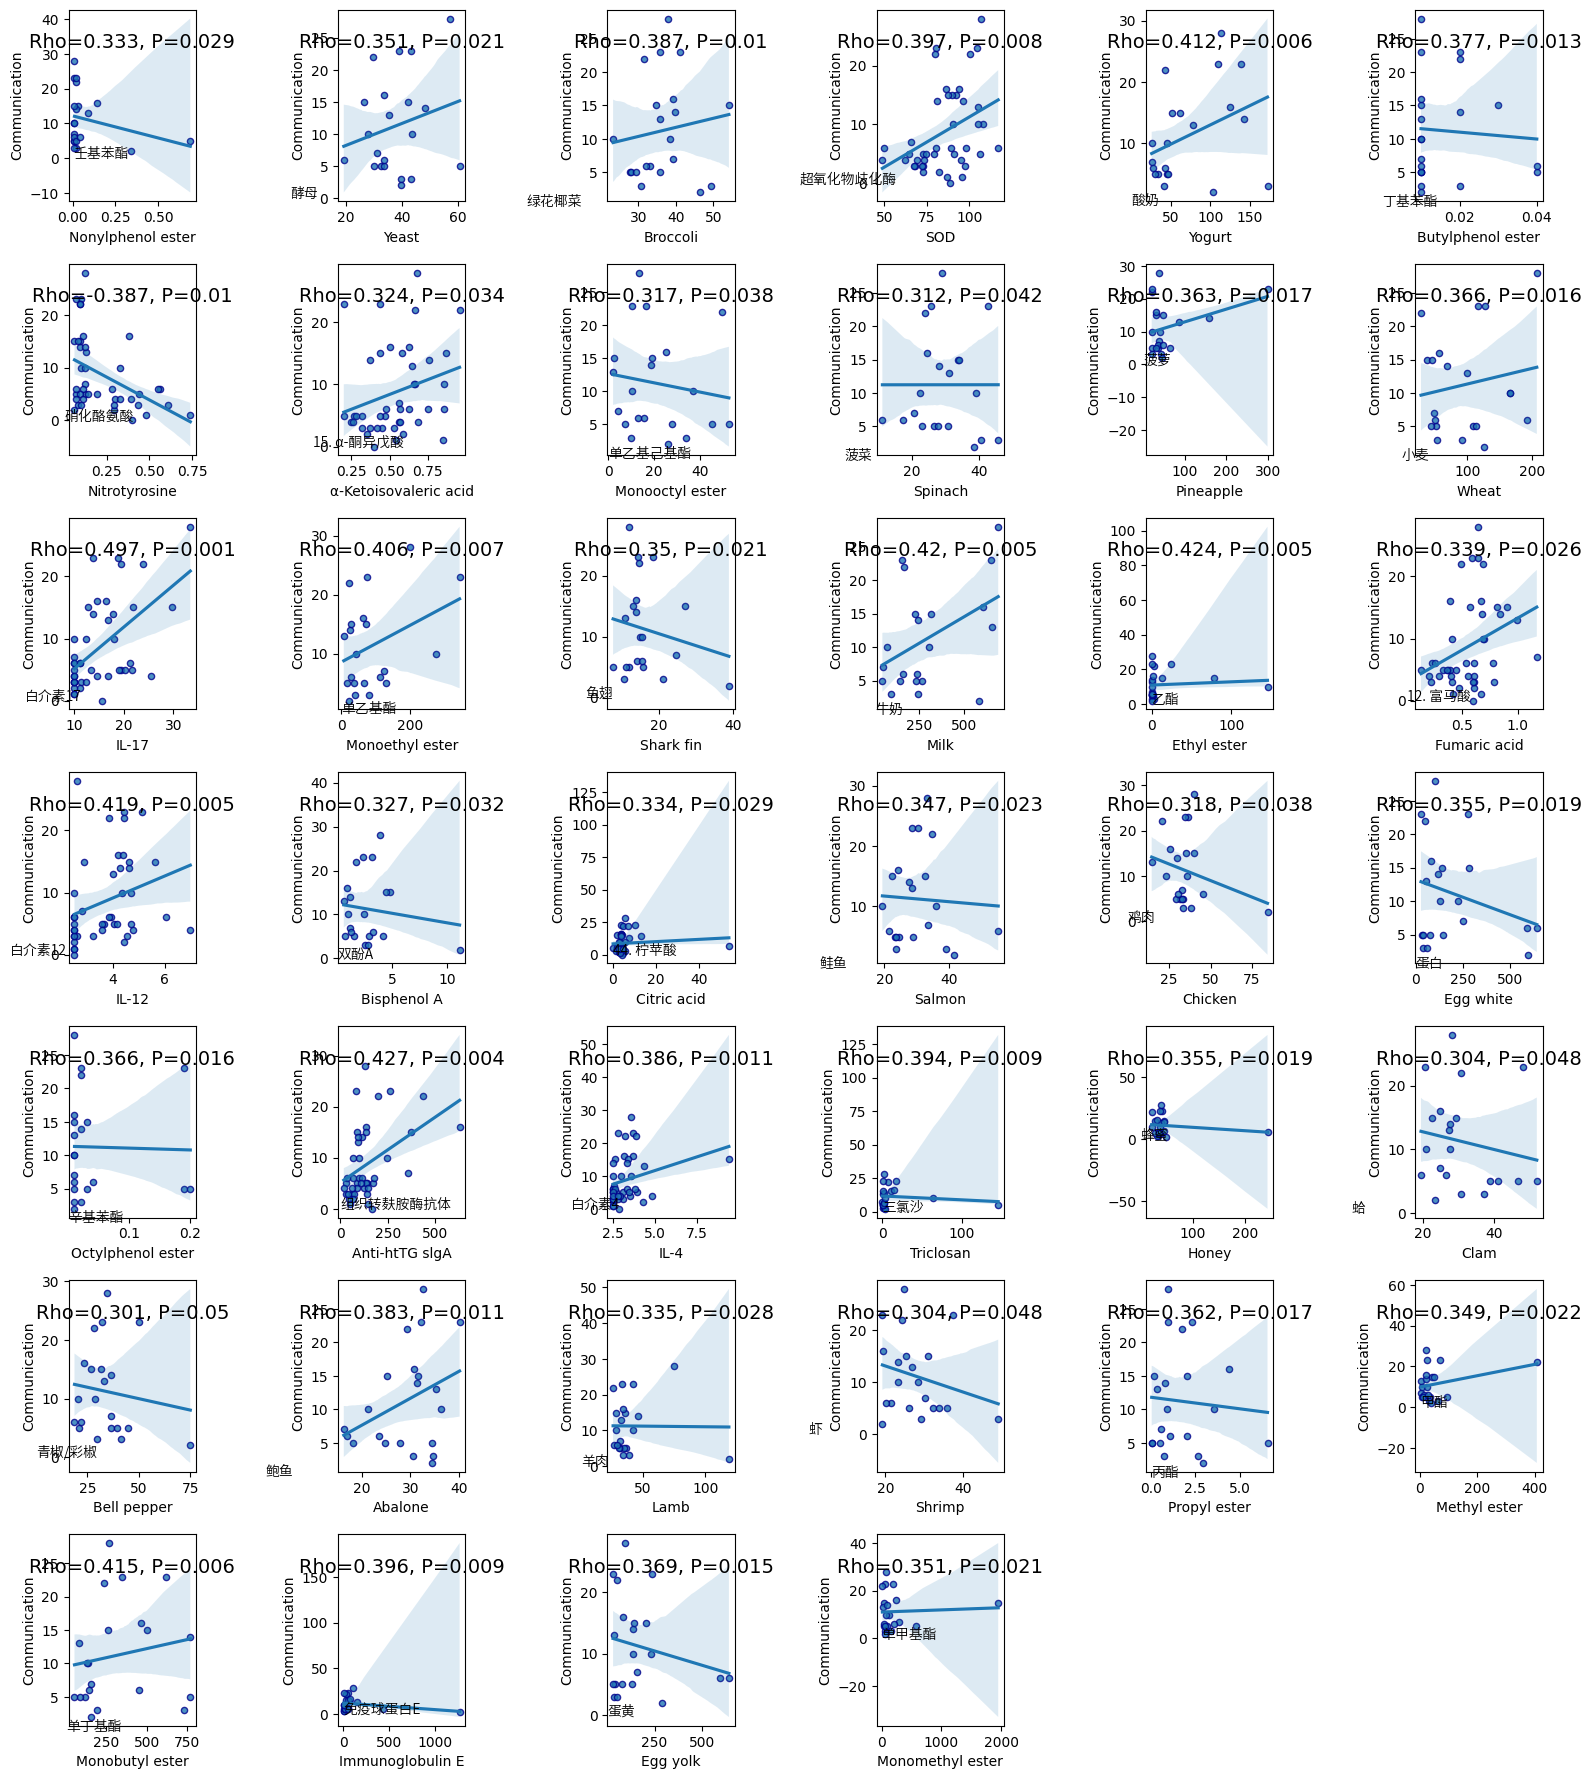

In [206]:
plt.rcParams['font.family'] = 'Arial'
ados_columns = ['Communication', 'social_interaction', 'stereotyped_behavior', 'ASD_total'][:1]
metabolites = sel_idct
plt.figure(figsize=(16,20))

count=1
for j,metabolite in enumerate(metabolites):
    for i,ados_col in enumerate(ados_columns):        
        r,p=stats.spearmanr(merged_df[metabolite].fillna(0),merged_df[ados_col].fillna(0))
        if p < 0.05:
            
            plt.subplot(8,6,count)
            count+=1
            
            sns.regplot(x=metabolite, y=ados_col, data=merged_df,scatter_kws={'s': 20,'edgecolor':'darkblue'})
            plt.text(0,0,metabolite,fontproperties=font2)
            plt.xlabel(eng_chi_dict[metabolite])
            fontproperties=font
            

            plt.ylabel(ados_col)
            plt.text(0.5, 0.8, f'Rho={round(r, 3)}, P={round(p, 3)}', 
                     fontsize=14, transform=plt.gca().transAxes, ha='center')
plt.tight_layout()
plt.show()

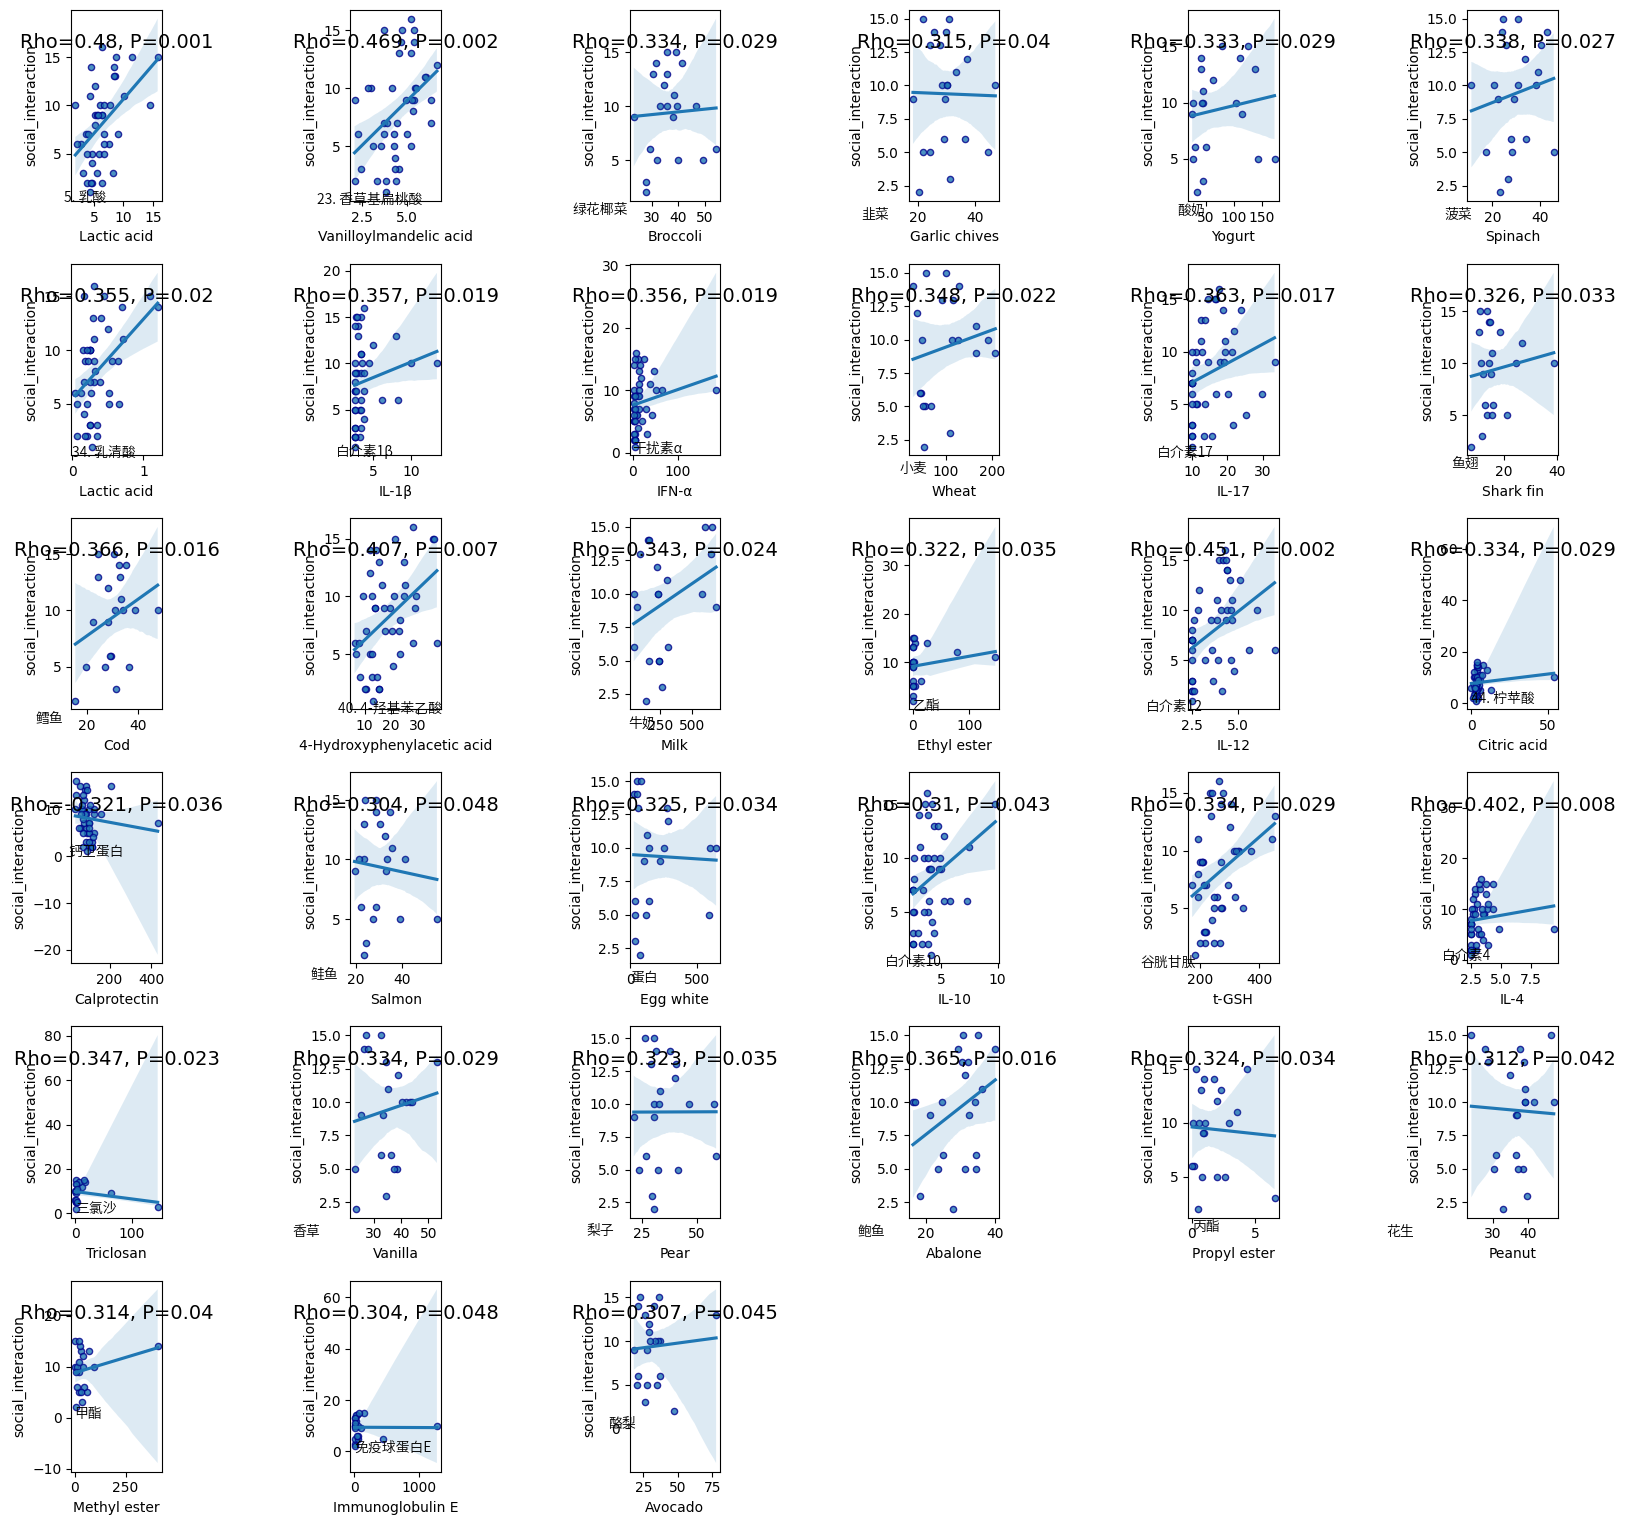

In [207]:
plt.rcParams['font.family'] = 'Arial'
ados_columns = [ 'social_interaction']
metabolites = sel_idct
plt.figure(figsize=(16,20))

count=1
for j,metabolite in enumerate(metabolites):
    for i,ados_col in enumerate(ados_columns):        
        r,p=stats.spearmanr(merged_df[metabolite].fillna(0),merged_df[ados_col].fillna(0))
        if p < 0.05:
            
            plt.subplot(8,6,count)
            count+=1
            
            sns.regplot(x=metabolite, y=ados_col, data=merged_df,scatter_kws={'s': 20,'edgecolor':'darkblue'})
            plt.text(0,0,metabolite,fontproperties=font2)
            plt.xlabel(eng_chi_dict[metabolite])
            fontproperties=font
            

            plt.ylabel(ados_col)
            plt.text(0.5, 0.8, f'Rho={round(r, 3)}, P={round(p, 3)}', 
                     fontsize=14, transform=plt.gca().transAxes, ha='center')
plt.tight_layout()
plt.show()

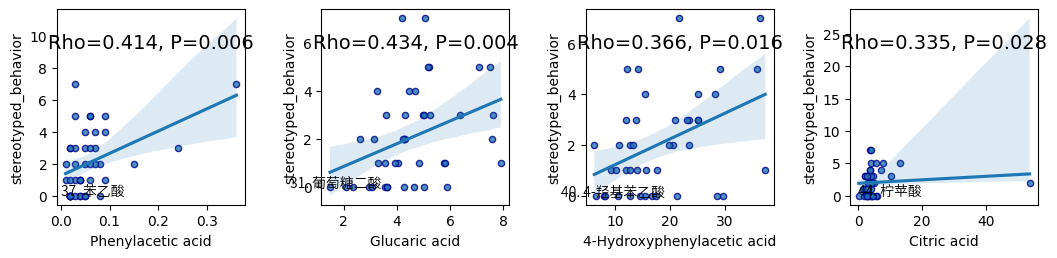

In [209]:
plt.rcParams['font.family'] = 'Arial'
ados_columns = [ 'stereotyped_behavior']
metabolites = sel_idct
plt.figure(figsize=(16,20))

count=1
for j,metabolite in enumerate(metabolites):
    for i,ados_col in enumerate(ados_columns):        
        r,p=stats.spearmanr(merged_df[metabolite].fillna(0),merged_df[ados_col].fillna(0))
        if p < 0.05:
            
            plt.subplot(8,6,count)
            count+=1
            
            sns.regplot(x=metabolite, y=ados_col, data=merged_df,scatter_kws={'s': 20,'edgecolor':'darkblue'})
            plt.text(0,0,metabolite,fontproperties=font2)
            plt.xlabel(eng_chi_dict[metabolite])
            fontproperties=font
            

            plt.ylabel(ados_col)
            plt.text(0.5, 0.8, f'Rho={round(r, 3)}, P={round(p, 3)}', 
                     fontsize=14, transform=plt.gca().transAxes, ha='center')
plt.tight_layout()
plt.show()

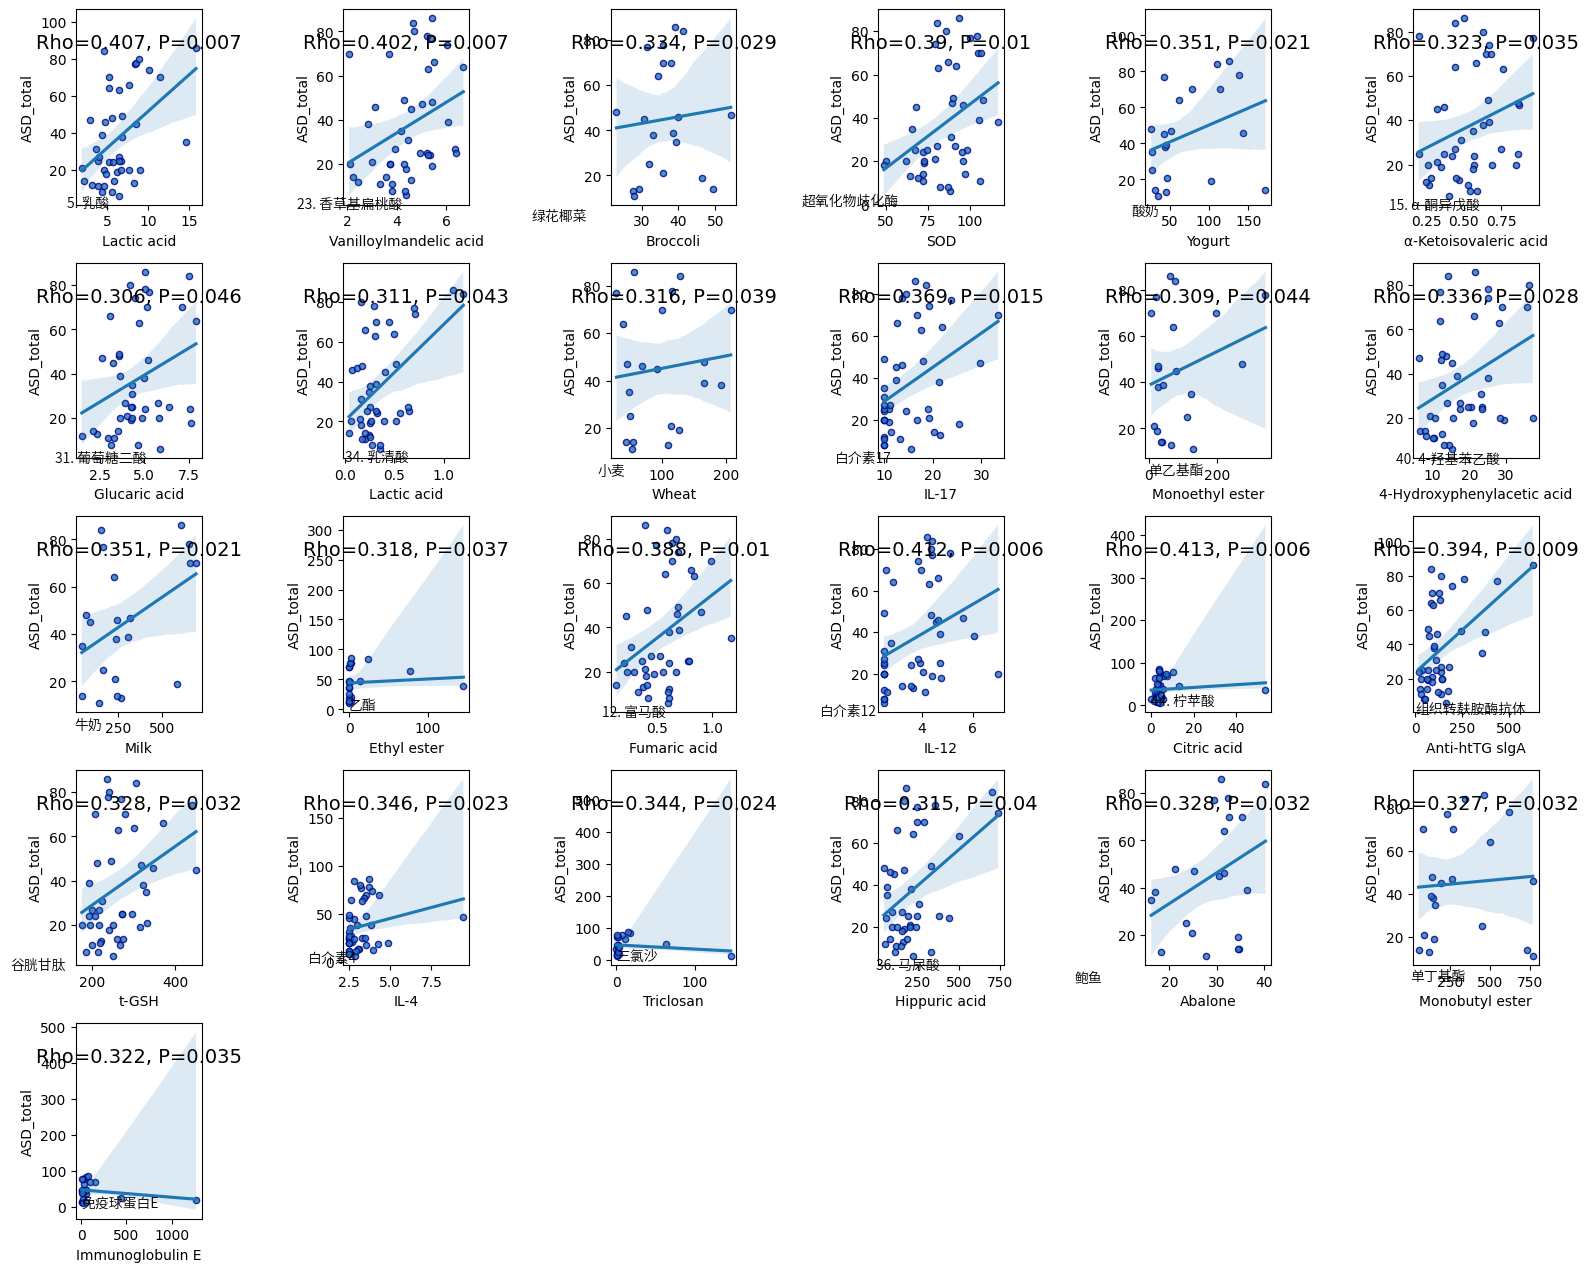

In [208]:
plt.rcParams['font.family'] = 'Arial'
ados_columns = [ 'ASD_total']
metabolites = sel_idct
plt.figure(figsize=(16,20))

count=1
for j,metabolite in enumerate(metabolites):
    for i,ados_col in enumerate(ados_columns):        
        r,p=stats.spearmanr(merged_df[metabolite].fillna(0),merged_df[ados_col].fillna(0))
        if p < 0.05:
            
            plt.subplot(8,6,count)
            count+=1
            
            sns.regplot(x=metabolite, y=ados_col, data=merged_df,scatter_kws={'s': 20,'edgecolor':'darkblue'})
            plt.xlabel(eng_chi_dict[metabolite])
            plt.text(0,0,metabolite,fontproperties=font2)
            fontproperties=font
            

            plt.ylabel(ados_col)
            plt.text(0.5, 0.8, f'Rho={round(r, 3)}, P={round(p, 3)}', 
                     fontsize=14, transform=plt.gca().transAxes, ha='center')
plt.tight_layout()
plt.show()

## 基因突变与ados分数的相关性

In [41]:
merged_df.columns[188:474] 

Index(['number_x', 'chr17-36361992-36361992-C-T-LOC101929950',
       'chr16-21548095-21548095-G-A-SLC7A5P2',
       'chr1-144816621-144816621-A-G-NBPF8',
       'chrX-146341299-146341299-G-A-MIR509-3',
       'chr16-33379851-33379851-G-A-LOC390705',
       'chr1-16976223-16976223-C-T-MST1P2',
       'chr1-145282093-145282093-G-A-NOTCH2NLC',
       'chr16-33380263-33380263-C-G-LOC390705',
       'chr1-144874578-144874578-C-T-LOC100996724',
       ...
       'chr1-16945504-16945504-C-T-CROCCP2',
       'chr1-148891790-148891790-T-A-LOC101927429',
       'chr14-19807178-19807178-C-T-LINC01297-DUXAP10-NBEAP6',
       'chr12-31247819-31247819-A-G-DDX11',
       'chr5-99715833-99715833-T-A-LOC100133050',
       'chr6-58779097-58779097-A-G-LINC00680-GUSBP4',
       'chr11-18290636-18290636-A-T-SAA1', 'chr7-72081604-72081604-G-T-TYW1B',
       'chr2-112616040-112616040-T-C-ANAPC1',
       'chr6-58779097-58779097-A-G-NONE'],
      dtype='object', length=286)

In [42]:
merged_df

,Unnamed: 0,病历号,1. 己二酸,10. α-酮戊二酸,11. 琥珀酸,12. 富马酸,13. 苹果酸,14. 羟甲基戊二酸,15. α-酮异戊酸,16. α-酮异己酸,...,chr7-72081604-72081604-G-T-TYW1B,chr2-112616040-112616040-T-C-ANAPC1,chr6-58779097-58779097-A-G-NONE,chr1-121484945-121484945-T-C-NONE,type,number_y,Communication,social_interaction,stereotyped_behavior,ASD_total
0,0,ASD_051,1.87,33.93,6.95,0.37,0.63,10.62,0.47,0.24,...,nonmutant,nonmutant,nonmutant,nonmutant,ASD,ASD_051,5.0,3.0,0.0,13.0
1,1,ASD_052,2.77,20.57,7.80,0.41,0.99,9.85,0.45,0.34,...,nonmutant,nonmutant,nonmutant,nonmutant,ASD,ASD_052,3.0,5.0,0.0,14.0
2,2,ASD_053,2.38,7.64,7.58,0.22,0.36,9.21,0.32,0.22,...,nonmutant,nonmutant,mut,nonmutant,ASD,ASD_053,3.0,13.0,4.0,45.0
3,3,ASD_054,1.35,7.81,5.75,0.39,0.27,6.66,0.32,0.19,...,nonmutant,mut,nonmutant,nonmutant,ASD,ASD_054,5.0,10.0,1.0,21.0
4,4,ASD_055,2.57,16.94,12.35,0.47,0.54,10.66,0.35,0.24,...,nonmutant,mut,nonmutant,nonmutant,ASD,ASD_055,2.0,10.0,0.0,19.0
5,5,ASD_056,1.42,28.81,3.72,0.59,1.01,6.70,0.44,0.18,...,nonmutant,mut,nonmutant,nonmutant,ASD,ASD_056,23.0,14.0,5.0,84.0
6,6,ASD_057,2.17,28.25,4.63,0.57,0.83,10.08,0.44,0.20,...,nonmutant,mut,nonmutant,nonmutant,ASD,ASD_057,15.0,12.0,1.0,64.0
7,7,ASD_058,2.23,14.89,7.51,1.17,2.64,6.67,0.56,0.21,...,nonmutant,mut,nonmutant,nonmutant,ASD,ASD_058,7.0,10.0,2.0,35.0
8,8,ASD_060,1.89,34.13,15.11,0.99,2.70,6.65,0.65,0.22,...,nonmutant,mut,nonmutant,nonmutant,ASD,ASD_060,13.0,15.0,5.0,70.0
9,9,ASD_062,1.63,22.15,5.56,0.33,0.43,6.38,0.27,0.25,...,nonmutant,nonmutant,mut,nonmutant,ASD,ASD_062,5.0,2.0,0.0,11.0


In [43]:
import pandas as pd
from scipy import stats

gene_sites = merged_df.columns[188:474]indicators = merged_df.columns[-4:]
df=merged_df
t_test_results = {}

for gene_site in gene_sites:
    mutant_data = df[df[gene_site] == 'mut']#.drop(columns=gene_sites + ['type'])
    nonmutant_data = df[df[gene_site] == 'nonmutant']#.drop(columns=gene_sites + ['type'])
    
    gene_site_results = {}
    
    for indicator in indicators:
        mutant_indicator_data = mutant_data[indicator].dropna()
        nonmutant_indicator_data = nonmutant_data[indicator].dropna()
        
        if len(mutant_indicator_data) > 1 and len(nonmutant_indicator_data) > 1:
            t_stat, p_value = stats.mannwhitneyu(mutant_indicator_data, nonmutant_indicator_data,alternative="greater")
            gene_site_results[indicator] = {'t_stat': t_stat, 'p_value': p_value}
        else:
            gene_site_results[indicator] = {'t_stat': None, 'p_value': None}
    
    t_test_results[gene_site] = gene_site_results

In [44]:
significant_results = {}

for gene_site, indicator_results in t_test_results.items():
    significant_indicators = {}
    
    for indicator, stats1 in indicator_results.items():
        if str(stats1['p_value']) !='None':
            if stats1['p_value'] < 0.05:
                significant_indicators[indicator] = stats1
    
    if significant_indicators:
        significant_results[gene_site] = significant_indicators

result_list = []
 
for gene_site, indicators in significant_results.items():
    for indicator, stats1 in indicators.items():
        result_list.append([gene_site, indicator, stats1['p_value']])
 
'''for item in result_list:
    print(item)'''

'for item in result_list:\n    print(item)'

In [45]:
significantdf=pd.DataFrame(result_list,columns=['geneloci','indicator','p_value'])

significantdf

,geneloci,indicator,p_value
0,chr16-33380263-33380263-C-G-LOC390705,social_interaction,0.036845
1,chr16-70177618-70177618-G-A-PDPR,social_interaction,0.024919
2,chr16-70177618-70177618-G-A-PDPR,stereotyped_behavior,0.018330
3,chr1-16969246-16969246-G-A-MST1P2,Communication,0.020763
4,chr15-84908411-84908411-G-A-GOLGA6L4,social_interaction,0.048731
5,chr1-16969246-16969246-G-A-CROCCP2,Communication,0.020763
6,chr16-70165793-70165793-G-C-PDPR,Communication,0.044032
7,chr16-70165793-70165793-G-C-PDPR,social_interaction,0.031084
8,chr16-70165793-70165793-G-C-PDPR,ASD_total,0.025078
9,chr16-21747881-21747881-G-A-OTOA,Communication,0.037142


In [72]:
def format_gene2(row):
    parts = row.split('-')    chrom = parts[0]    pos = parts[1]    ref = parts[3]    alt = parts[4]    return f"{chrom}:g.{pos}{ref}>{alt}"
significantdf['gene2_formatted'] = significantdf['geneloci'].apply(format_gene2)

significantdf

,geneloci,indicator,p_value,gene2_formatted
0,chr16-33380263-33380263-C-G-LOC390705,social_interaction,0.036845,chr16:g.33380263C>G
1,chr16-70177618-70177618-G-A-PDPR,social_interaction,0.024919,chr16:g.70177618G>A
2,chr16-70177618-70177618-G-A-PDPR,stereotyped_behavior,0.018330,chr16:g.70177618G>A
3,chr1-16969246-16969246-G-A-MST1P2,Communication,0.020763,chr1:g.16969246G>A
4,chr15-84908411-84908411-G-A-GOLGA6L4,social_interaction,0.048731,chr15:g.84908411G>A
5,chr1-16969246-16969246-G-A-CROCCP2,Communication,0.020763,chr1:g.16969246G>A
6,chr16-70165793-70165793-G-C-PDPR,Communication,0.044032,chr16:g.70165793G>C
7,chr16-70165793-70165793-G-C-PDPR,social_interaction,0.031084,chr16:g.70165793G>C
8,chr16-70165793-70165793-G-C-PDPR,ASD_total,0.025078,chr16:g.70165793G>C
9,chr16-21747881-21747881-G-A-OTOA,Communication,0.037142,chr16:g.21747881G>A


In [83]:
significantdf=significantdf[significantdf['p_value']<0.05]

In [84]:
significantdf

,geneloci,indicator,p_value,gene2_formatted
0,chr16-33380263-33380263-C-G-LOC390705,social_interaction,0.036845,chr16:g.33380263C>G
1,chr16-70177618-70177618-G-A-PDPR,social_interaction,0.024919,chr16:g.70177618G>A
2,chr16-70177618-70177618-G-A-PDPR,stereotyped_behavior,0.018330,chr16:g.70177618G>A
3,chr1-16969246-16969246-G-A-MST1P2,Communication,0.020763,chr1:g.16969246G>A
4,chr15-84908411-84908411-G-A-GOLGA6L4,social_interaction,0.048731,chr15:g.84908411G>A
5,chr1-16969246-16969246-G-A-CROCCP2,Communication,0.020763,chr1:g.16969246G>A
6,chr16-70165793-70165793-G-C-PDPR,Communication,0.044032,chr16:g.70165793G>C
7,chr16-70165793-70165793-G-C-PDPR,social_interaction,0.031084,chr16:g.70165793G>C
8,chr16-70165793-70165793-G-C-PDPR,ASD_total,0.025078,chr16:g.70165793G>C
9,chr16-21747881-21747881-G-A-OTOA,Communication,0.037142,chr16:g.21747881G>A


In [77]:
loci_dict=dict(zip(significantdf['geneloci'],significantdf['gene2_formatted']))

In [78]:
significantdf['indicator'].value_counts()

Communication           19
ASD_total               13
social_interaction      10
stereotyped_behavior     9
Name: indicator, dtype: int64

In [70]:
significantdf1=pd.read_csv('ADOS_gene_alternative=greater.csv')

In [52]:
significantdf2=pd.read_csv('ADOS_gene.csv')

In [71]:
significantdf1

,Unnamed: 0,geneloci,indicator,p_value,gene2_formatted
0,0,chr16-33380263-33380263-C-G-LOC390705,social_interaction,0.036845,chr16:g.33380263C>G
1,1,chr16-70177618-70177618-G-A-PDPR,social_interaction,0.024919,chr16:g.70177618G>A
2,2,chr16-70177618-70177618-G-A-PDPR,stereotyped_behavior,0.018330,chr16:g.70177618G>A
3,3,chr1-16969246-16969246-G-A-MST1P2,Communication,0.020763,chr1:g.16969246G>A
4,4,chr15-84908411-84908411-G-A-GOLGA6L4,social_interaction,0.048731,chr15:g.84908411G>A
5,5,chr1-16969246-16969246-G-A-CROCCP2,Communication,0.020763,chr1:g.16969246G>A
6,6,chr16-70165793-70165793-G-C-PDPR,Communication,0.044032,chr16:g.70165793G>C
7,7,chr16-70165793-70165793-G-C-PDPR,social_interaction,0.031084,chr16:g.70165793G>C
8,8,chr16-70165793-70165793-G-C-PDPR,ASD_total,0.025078,chr16:g.70165793G>C
9,9,chr16-21747881-21747881-G-A-OTOA,Communication,0.037142,chr16:g.21747881G>A


In [54]:
significantdf2

,Unnamed: 0,geneloci,indicator,p_value
0,0,chr15-20433733-20433733-A-C-CHEK2P2,stereotyped_behavior,0.028033
1,1,chr2-95515221-95515221-C-T-ANKRD20A8P,Communication,0.019797
2,2,chr2-95515221-95515221-C-T-ANKRD20A8P,stereotyped_behavior,0.018012
3,3,chr2-95515221-95515221-C-T-ANKRD20A8P,ASD_total,0.029565
4,4,chr12-64216816-64216816-A-C-MIR10527,Communication,0.032081
5,5,chr12-64216816-64216816-A-C-MIR10527,social_interaction,0.008761
6,6,chr12-64216816-64216816-A-C-MIR10527,stereotyped_behavior,0.012585
7,7,chr12-64216816-64216816-A-C-MIR10527,ASD_total,0.016842
8,8,chr1-16969246-16969246-G-A-MST1P2,Communication,0.041526
9,9,chr1-17014940-17014940-C-T-ESPNP,Communication,0.045729


In [79]:
result_list

[['chr16-33380263-33380263-C-G-LOC390705',
  'social_interaction',
  0.03684528623293877],
 ['chr16-70177618-70177618-G-A-PDPR',
  'social_interaction',
  0.024919210879822632],
 ['chr16-70177618-70177618-G-A-PDPR',
  'stereotyped_behavior',
  0.018330214921663004],
 ['chr1-16969246-16969246-G-A-MST1P2', 'Communication', 0.020763160139978278],
 ['chr15-84908411-84908411-G-A-GOLGA6L4',
  'social_interaction',
  0.04873129760533003],
 ['chr1-16969246-16969246-G-A-CROCCP2', 'Communication', 0.020763160139978278],
 ['chr16-70165793-70165793-G-C-PDPR', 'Communication', 0.04403233455734935],
 ['chr16-70165793-70165793-G-C-PDPR',
  'social_interaction',
  0.03108368423365182],
 ['chr16-70165793-70165793-G-C-PDPR', 'ASD_total', 0.025077823658516563],
 ['chr16-21747881-21747881-G-A-OTOA', 'Communication', 0.03714247427408093],
 ['chr16-21747881-21747881-G-A-OTOA', 'ASD_total', 0.04634578575417051],
 ['chr2-95515221-95515221-C-T-ANKRD20A8P',
  'Communication',
  0.009898313293898486],
 ['chr2-95

In [80]:
combine_snp = {}
for entry in all_gene_set:
    parts = entry.split('-')
    chrom = parts[0]  # chr1
    pos = parts[1]    ref = parts[3]    alt = parts[4]    new_entry = f"{chrom}:g.{pos}{ref}>{alt}"
    combine_snp[entry]=new_entry
combine_snp

{'chr5-140207965-140207965-G-C-PCDHA6': 'chr5:g.140207965G>C',
 'chr15-32717010-32717010-G-A-ULK4P2': 'chr15:g.32717010G>A',
 'chr7-142467540-142467540-A-G-PRSS1': 'chr7:g.142467540A>G',
 'chr1-148891790-148891790-T-A-LOC101927429': 'chr1:g.148891790T>A',
 'chr1-143210303-143210303-T-G-LOC102723769': 'chr1:g.143210303T>G',
 'chr17-36339817-36339817-G-A-TBC1D3D': 'chr17:g.36339817G>A',
 'chr2-88125234-88125234-T-C-RGPD2': 'chr2:g.88125234T>C',
 'chr2-88019376-88019376-C-T-LOC730268': 'chr2:g.88019376C>T',
 'chr17-36339817-36339817-G-A-TBC1D3E': 'chr17:g.36339817G>A',
 'chr1-148903758-148903758-A-G-DRD5P2': 'chr1:g.148903758A>G',
 'chr14-19807178-19807178-C-T-LNCRNA-ATB': 'chr14:g.19807178C>T',
 'chr1-16952267-16952267-T-C-CROCCP2': 'chr1:g.16952267T>C',
 'chr1-16976223-16976223-C-T-MST1P2': 'chr1:g.16976223C>T',
 'chr1-145281247-145281247-T-A-NOTCH2NLR': 'chr1:g.145281247T>A',
 'chr15-102312009-102312009-G-A-OR4F6': 'chr15:g.102312009G>A',
 'chr16-33534075-33534075-C-T-ENPP7P13': 'chr16

In [81]:
len(result_list)

51

In [82]:
significantdf[significantdf['indicator']=='social_interaction']['geneloci'].tolist()

['chr16-33380263-33380263-C-G-LOC390705',
 'chr16-70177618-70177618-G-A-PDPR',
 'chr15-84908411-84908411-G-A-GOLGA6L4',
 'chr16-70165793-70165793-G-C-PDPR',
 'chr15-32717010-32717010-G-A-ULK4P1',
 'chr12-64216816-64216816-A-C-RXYLT1-AS1',
 'chr12-64216816-64216816-A-C-MIR10527',
 'chr16-33380263-33380263-C-G-ENPP7P13',
 'chr1-16918717-16918717-C-T-NBPF1',
 'chr15-32717010-32717010-G-A-ULK4P2']

In [85]:
targetdf3=merged_df[[
 'chr16-33380263-33380263-C-G-ENPP7P13',
'chr16-70177618-70177618-G-A-PDPR', 
'chr15-84908411-84908411-G-A-GOLGA6L4',
'chr1-16918717-16918717-C-T-NBPF1',
'social_interaction']]

In [ ]:
[ 'chr16-33380263-33380263-C-G-ENPP7P13','chr16-70177618-70177618-G-A-PDPR', 'chr15-84908411-84908411-G-A-GOLGA6L4','chr1-16918717-16918717-C-T-NBPF1',]

In [58]:
significantdf[significantdf['indicator']=='stereotyped_behavior']['geneloci'].tolist()

['chr16-70177618-70177618-G-A-PDPR',
 'chr2-95515221-95515221-C-T-ANKRD20A8P',
 'chr14-70924335-70924335-C-T-ADAM21',
 'chr15-20433733-20433733-A-C-NONE',
 'chr12-64216816-64216816-A-C-RXYLT1-AS1',
 'chr12-64216816-64216816-A-C-MIR10527',
 'chr15-20433733-20433733-A-C-CHEK2P2',
 'chr1-16918717-16918717-C-T-NBPF1',
 'chr2-97749407-97749407-C-T-FAHD2B']

In [94]:
targetdf2=merged_df[[
'chr15-20433733-20433733-A-C-CHEK2P2',
 'chr2-95515221-95515221-C-T-ANKRD20A8P',
 'chr1-16918717-16918717-C-T-NBPF1',
 'chr14-70924335-70924335-C-T-ADAM21',
 'chr16-70177618-70177618-G-A-PDPR','stereotyped_behavior']]

In [60]:
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42

In [87]:
targetdf3

,chr16-33380263-33380263-C-G-ENPP7P13,chr16-70177618-70177618-G-A-PDPR,chr15-84908411-84908411-G-A-GOLGA6L4,chr1-16918717-16918717-C-T-NBPF1,social_interaction
0,nonmutant,nonmutant,nonmutant,nonmutant,3.0
1,nonmutant,nonmutant,nonmutant,nonmutant,5.0
2,mut,mut,nonmutant,nonmutant,13.0
3,nonmutant,nonmutant,nonmutant,nonmutant,10.0
4,mut,nonmutant,nonmutant,nonmutant,10.0
5,nonmutant,nonmutant,nonmutant,mut,14.0
6,nonmutant,nonmutant,nonmutant,nonmutant,12.0
7,nonmutant,nonmutant,mut,nonmutant,10.0
8,mut,nonmutant,nonmutant,nonmutant,15.0
9,nonmutant,nonmutant,nonmutant,nonmutant,2.0


In [112]:
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42

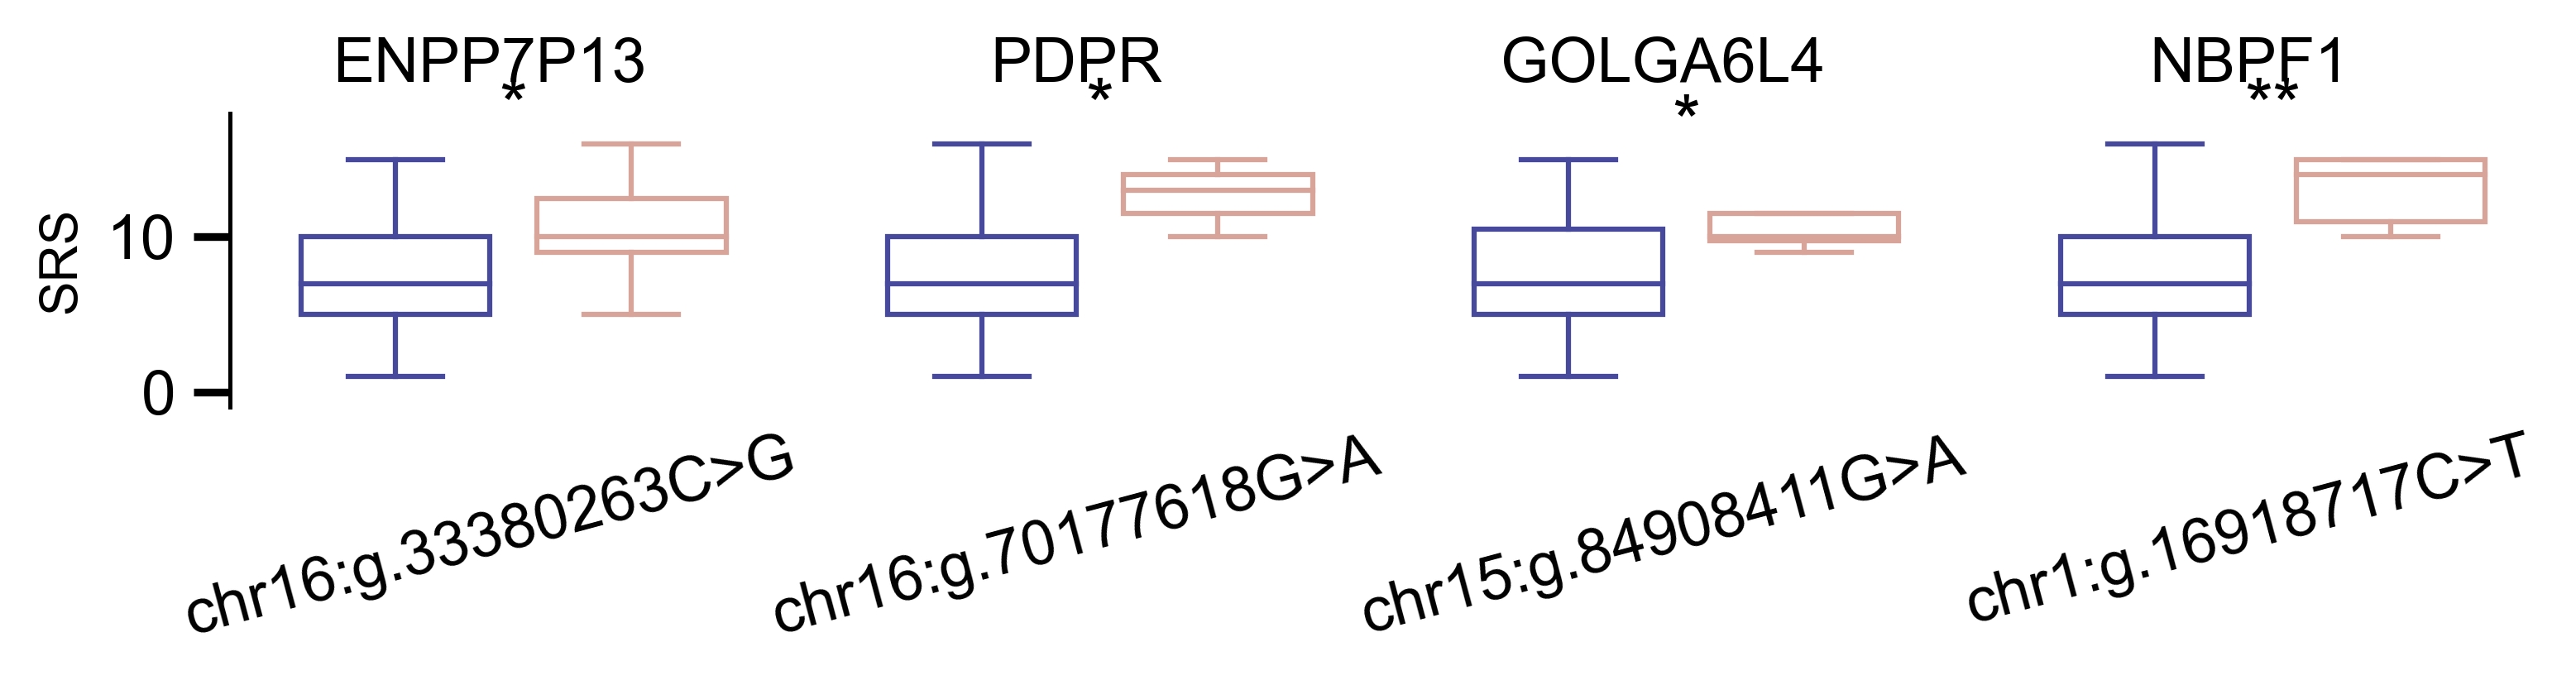

In [128]:
listA=result_list

plt.subplots(figsize=(7,2),dpi=450)
for j,i in enumerate([ 'chr16-33380263-33380263-C-G-ENPP7P13',
                      'chr16-70177618-70177618-G-A-PDPR', 
                      'chr15-84908411-84908411-G-A-GOLGA6L4',
                      'chr1-16918717-16918717-C-T-NBPF1']
                      ):
    plt.subplot(1,4,j+1)
    plt.rcParams['font.family'] = 'Arial'
    colors=['grey','red']
    clsls=['nonmutant','mut']
    
    data=[ 
    targetdf3[targetdf3[ i ]=='nonmutant'][ 'social_interaction' ].dropna().tolist(),
    targetdf3[targetdf3[ i ]==      'mut'][ 'social_interaction' ].dropna().tolist(),
    ]
    colors =['#46499c','#d8a398']
    wkls1=[]
    wkls2=[]
    for num, d in enumerate(data):
        box=plt.boxplot(d, positions=[num + 1], widths=0.8, patch_artist=True,
                    boxprops=dict(facecolor='white',edgecolor =colors[num],linewidth=1),
                    medianprops=dict(color=colors[num],linewidth=1),
                    whiskerprops={'color': colors[num],'linewidth':1},
                    capprops={'color': colors[num],'linewidth':1},
                    flierprops=dict(marker='o', color='black', markersize=0))
        
        lower_whisker = box['whiskers'][0].get_ydata()[1]        upper_whisker = box['whiskers'][1].get_ydata()[1]        wkls1.append(lower_whisker)
        wkls2.append(upper_whisker)

    plt.ylim(np.min(wkls1)*0.9-0.1*np.max(wkls2),np.max(wkls2)*1.1)

    u_statistic, p_value = stats.mannwhitneyu(data[0],data[1],alternative="less")
    if p_value>0.05:
        star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
        star='*'
    elif (p_value <=0.01) &(p_value >0.001):
        star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
        star='***'
    else:
        star='****'
    plt.text(1.5, np.max(wkls2)*1.05, star, ha='center', fontsize=14)
    plt.title(i.split('-')[-1], fontsize=12)
    plt.xticks([])
    plt.xlim(0.3,len(clsls)+0.5)
    plt.ylim(-1,18)
    plt.tick_params(which='both', width=1.5, length=7, left=True, bottom=False)
    plt.xlabel(loci_dict[i], fontsize=12,rotation=15)
    plt.ylabel('SRS', fontsize=10)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    
    if j>0:
        plt.gca().spines['left'].set_visible(False)
        plt.yticks([])
        plt.ylabel('', fontsize=10)

plt.tight_layout()
plt.savefig('Fig2E3.pdf', bbox_inches='tight')
plt.show()

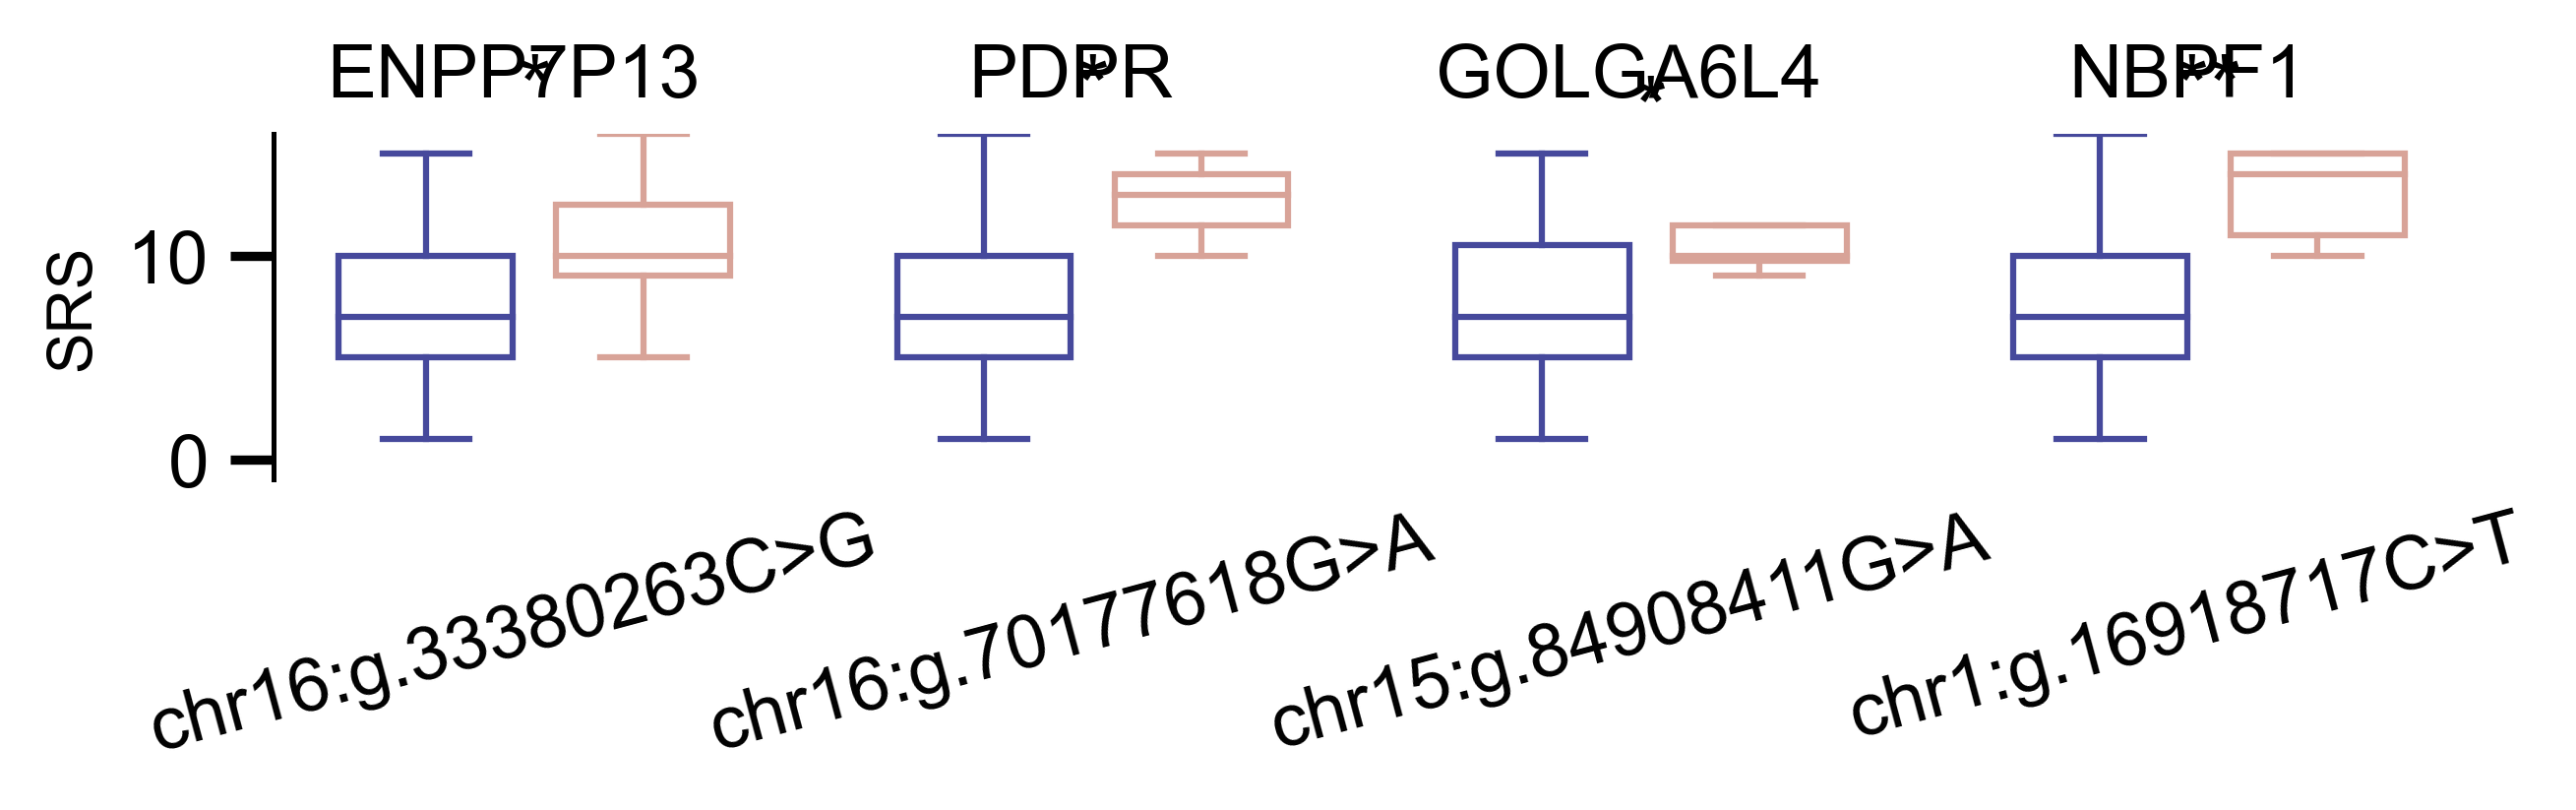

In [131]:
listA=result_list

plt.subplots(figsize=(7,2),dpi=450)
for j,i in enumerate(['chr16-33380263-33380263-C-G-ENPP7P13',
                      'chr16-70177618-70177618-G-A-PDPR', 
                      'chr15-84908411-84908411-G-A-GOLGA6L4',
                      'chr1-16918717-16918717-C-T-NBPF1']
                      ):
    plt.subplot(1,5,j+1)
    plt.rcParams['font.family'] = 'Arial'
    colors=['grey','red']
    clsls=['nonmutant','mut']
    
    data=[ 
    targetdf3[targetdf3[ i ]=='nonmutant'][ 'social_interaction' ].dropna().tolist(),
    targetdf3[targetdf3[ i ]==      'mut'][ 'social_interaction' ].dropna().tolist(),
    ]
    colors =['#46499c','#d8a398']
    wkls1=[]
    wkls2=[]
    for num, d in enumerate(data):
        box=plt.boxplot(d, positions=[num + 1], widths=0.8, patch_artist=True,
                    boxprops=dict(facecolor='white',edgecolor =colors[num],linewidth=1),
                    medianprops=dict(color=colors[num],linewidth=1),
                    whiskerprops={'color': colors[num],'linewidth':1},
                    capprops={'color': colors[num],'linewidth':1},
                    flierprops=dict(marker='o', color='black', markersize=0))
        
        lower_whisker = box['whiskers'][0].get_ydata()[1]        upper_whisker = box['whiskers'][1].get_ydata()[1]        wkls1.append(lower_whisker)
        wkls2.append(upper_whisker)

    plt.ylim(np.min(wkls1)*0.9-0.1*np.max(wkls2),np.max(wkls2)*1.1)

    u_statistic, p_value = stats.mannwhitneyu(data[0],data[1],alternative="less")
    if p_value>0.05:
        star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
        star='*'
    elif (p_value <=0.01) &(p_value >0.001):
        star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
        star='***'
    else:
        star='****'
    plt.text(1.5, np.max(wkls2)*1.05, star, ha='center', fontsize=14)
    plt.title(i.split('-')[-1], fontsize=12)
    plt.xticks([])
    plt.xlim(0.3,len(clsls)+0.5)
    plt.ylim(-1,16)
    plt.tick_params(which='both', width=1.5, length=7, left=True, bottom=False)
    plt.xlabel(loci_dict[i], fontsize=12,rotation=15)
    plt.ylabel('SRS', fontsize=10)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    
    if j>0:
        plt.gca().spines['left'].set_visible(False)
        plt.yticks([])
        plt.ylabel('', fontsize=10)

plt.tight_layout()
plt.savefig('Fig2E3.pdf', bbox_inches='tight')    # Show the plot
plt.show()

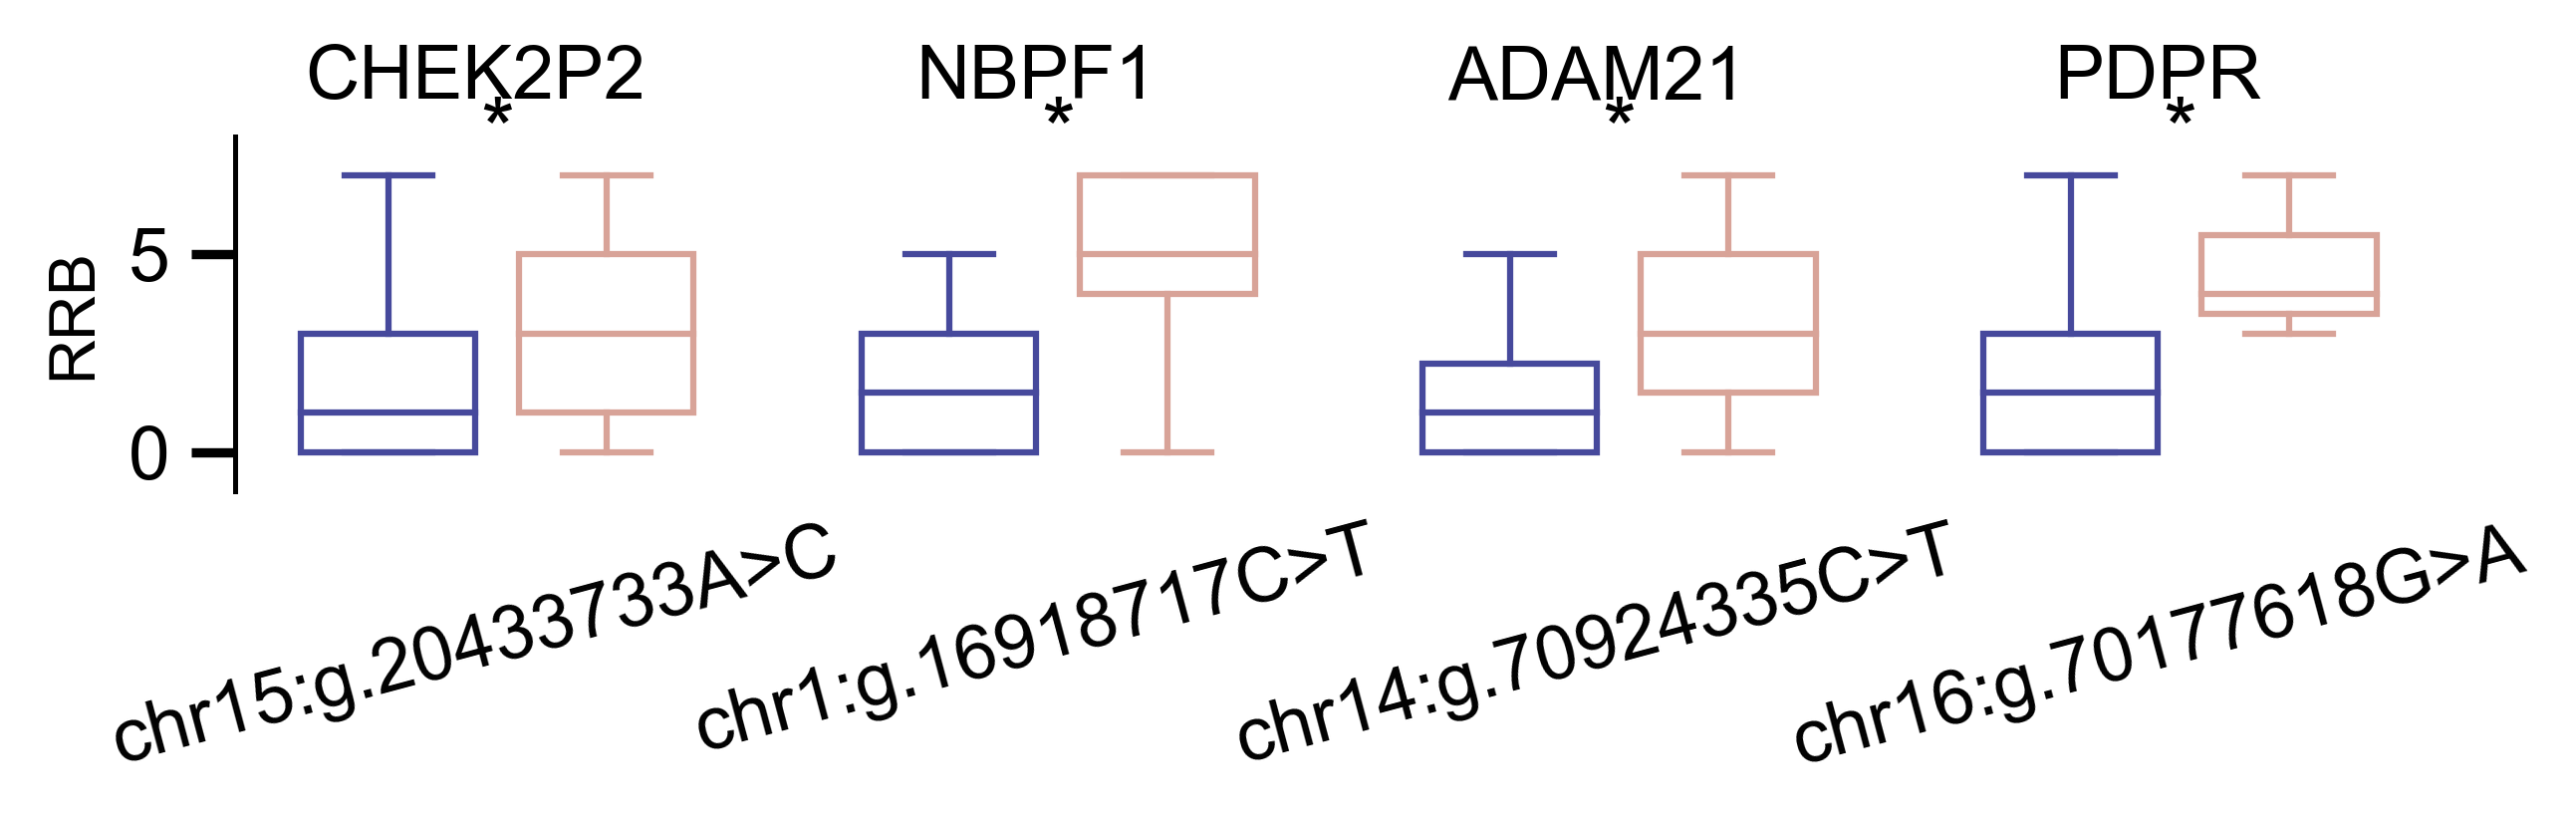

In [132]:
listA=result_list

plt.subplots(figsize=(7,2),dpi=450)
for j,i in enumerate([ 'chr15-20433733-20433733-A-C-CHEK2P2',
 'chr1-16918717-16918717-C-T-NBPF1',
 'chr14-70924335-70924335-C-T-ADAM21',
 'chr16-70177618-70177618-G-A-PDPR'
]
                      ):
    plt.subplot(1,5,j+1)
    plt.rcParams['font.family'] = 'Arial'
    colors=['grey','red']
    clsls=['nonmutant','mut']
    
    data=[ 
    targetdf2[targetdf2[ i ]=='nonmutant'][ 'stereotyped_behavior' ].dropna().tolist(),
    targetdf2[targetdf2[ i ]==      'mut'][ 'stereotyped_behavior' ].dropna().tolist(),
    ]
    colors =['#46499c','#d8a398']
    wkls1=[]
    wkls2=[]
    for num, d in enumerate(data):
        box=plt.boxplot(d, positions=[num + 1], widths=0.8, patch_artist=True,
                    boxprops=dict(facecolor='white',edgecolor =colors[num],linewidth=1),
                    medianprops=dict(color=colors[num],linewidth=1),
                    whiskerprops={'color': colors[num],'linewidth':1},
                    capprops={'color': colors[num],'linewidth':1},
                    flierprops=dict(marker='o', color='black', markersize=0))
        
        lower_whisker = box['whiskers'][0].get_ydata()[1]        upper_whisker = box['whiskers'][1].get_ydata()[1]        wkls1.append(lower_whisker)
        wkls2.append(upper_whisker)

    plt.ylim(np.min(wkls1)*0.9-0.1*np.max(wkls2),np.max(wkls2)*1.1)

    u_statistic, p_value = stats.mannwhitneyu(data[0],data[1],alternative="less")
    if p_value>0.05:
        star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
        star='*'
    elif (p_value <=0.01) &(p_value >0.001):
        star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
        star='***'
    else:
        star='****'
    plt.text(1.5, np.max(wkls2)*1.05, star, ha='center', fontsize=14)
    plt.title(i.split('-')[-1], fontsize=12)
    plt.xticks([])
    plt.xlim(0.3,len(clsls)+0.5)
    plt.ylim(-1,8)
    plt.tick_params(which='both', width=1.5, length=7, left=True, bottom=False)
    plt.xlabel(loci_dict[i], fontsize=12,rotation=15)
    plt.ylabel('RRB', fontsize=10)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    
    if j>0:
        plt.gca().spines['left'].set_visible(False)
        plt.yticks([])
        plt.ylabel('', fontsize=10)

plt.tight_layout()
plt.savefig('Fig2E1.pdf', bbox_inches='tight')    # Show the plot
plt.show()

In [ ]:
significantdf[significantdf['indicator']=='Communication']['geneloci'].tolist()

In [133]:
merged_df=pd.read_csv('test_gene_ADOS.csv',encoding="GBK")

In [134]:
merged_df.head()

,Unnamed: 0,病历号,1. 己二酸,10. α-酮戊二酸,11. 琥珀酸,12. 富马酸,13. 苹果酸,14. 羟甲基戊二酸,15. α-酮异戊酸,16. α-酮异己酸,...,chr7-72081604-72081604-G-T-TYW1B,chr2-112616040-112616040-T-C-ANAPC1,chr6-58779097-58779097-A-G-NONE,chr1-121484945-121484945-T-C-NONE,type,number_y,Communication,social_interaction,stereotyped_behavior,ASD_total
0,0,ASD_051,1.87,33.93,6.95,0.37,0.63,10.62,0.47,0.24,...,nonmutant,nonmutant,nonmutant,nonmutant,ASD,ASD_051,5.0,3.0,0.0,13.0
1,1,ASD_052,2.77,20.57,7.80,0.41,0.99,9.85,0.45,0.34,...,nonmutant,nonmutant,nonmutant,nonmutant,ASD,ASD_052,3.0,5.0,0.0,14.0
2,2,ASD_053,2.38,7.64,7.58,0.22,0.36,9.21,0.32,0.22,...,nonmutant,nonmutant,mut,nonmutant,ASD,ASD_053,3.0,13.0,4.0,45.0
3,3,ASD_054,1.35,7.81,5.75,0.39,0.27,6.66,0.32,0.19,...,nonmutant,mut,nonmutant,nonmutant,ASD,ASD_054,5.0,10.0,1.0,21.0
4,4,ASD_055,2.57,16.94,12.35,0.47,0.54,10.66,0.35,0.24,...,nonmutant,mut,nonmutant,nonmutant,ASD,ASD_055,2.0,10.0,0.0,19.0


In [98]:
targetdf=merged_df[[ 'chr1-17014940-17014940-C-T-ESPNP',
 'chr2-131984320-131984320-C-T-POTEE',
 'chr1-16918717-16918717-C-T-NBPF1',
 'chr1-17087682-17087682-A-G-MST1L',
 'chr1-16969246-16969246-G-A-CROCCP2',
 'chr12-31247819-31247819-A-G-DDX11','Communication']]

In [136]:
targetdf

,chr1-17014940-17014940-C-T-ESPNP,chr2-131984320-131984320-C-T-POTEE,chr1-16918717-16918717-C-T-NBPF1,chr1-17087682-17087682-A-G-MST1L,chr1-16969246-16969246-G-A-CROCCP2,chr12-31247819-31247819-A-G-DDX11,Communication
0,nonmutant,mut,nonmutant,mut,mut,nonmutant,5.0
1,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,3.0
2,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,3.0
3,nonmutant,nonmutant,nonmutant,mut,mut,nonmutant,5.0
4,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,2.0
5,nonmutant,nonmutant,mut,mut,nonmutant,mut,23.0
6,nonmutant,mut,nonmutant,mut,mut,mut,15.0
7,nonmutant,nonmutant,nonmutant,mut,mut,mut,7.0
8,nonmutant,nonmutant,nonmutant,nonmutant,mut,nonmutant,13.0
9,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,nonmutant,5.0


In [137]:
targetdf.melt(id_vars  ='Communication')

,Communication,variable,value
0,5.0,chr1-17014940-17014940-C-T-ESPNP,nonmutant
1,3.0,chr1-17014940-17014940-C-T-ESPNP,nonmutant
2,3.0,chr1-17014940-17014940-C-T-ESPNP,nonmutant
3,5.0,chr1-17014940-17014940-C-T-ESPNP,nonmutant
4,2.0,chr1-17014940-17014940-C-T-ESPNP,nonmutant
...,...,...,...
253,14.0,chr12-31247819-31247819-A-G-DDX11,nonmutant
254,4.0,chr12-31247819-31247819-A-G-DDX11,nonmutant
255,22.0,chr12-31247819-31247819-A-G-DDX11,mut
256,4.0,chr12-31247819-31247819-A-G-DDX11,nonmutant


In [138]:
sns.boxplot(data=targetdf.melt(id_vars  ='Communication'),
           x='')

ValueError: Could not interpret input ''

In [142]:
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42

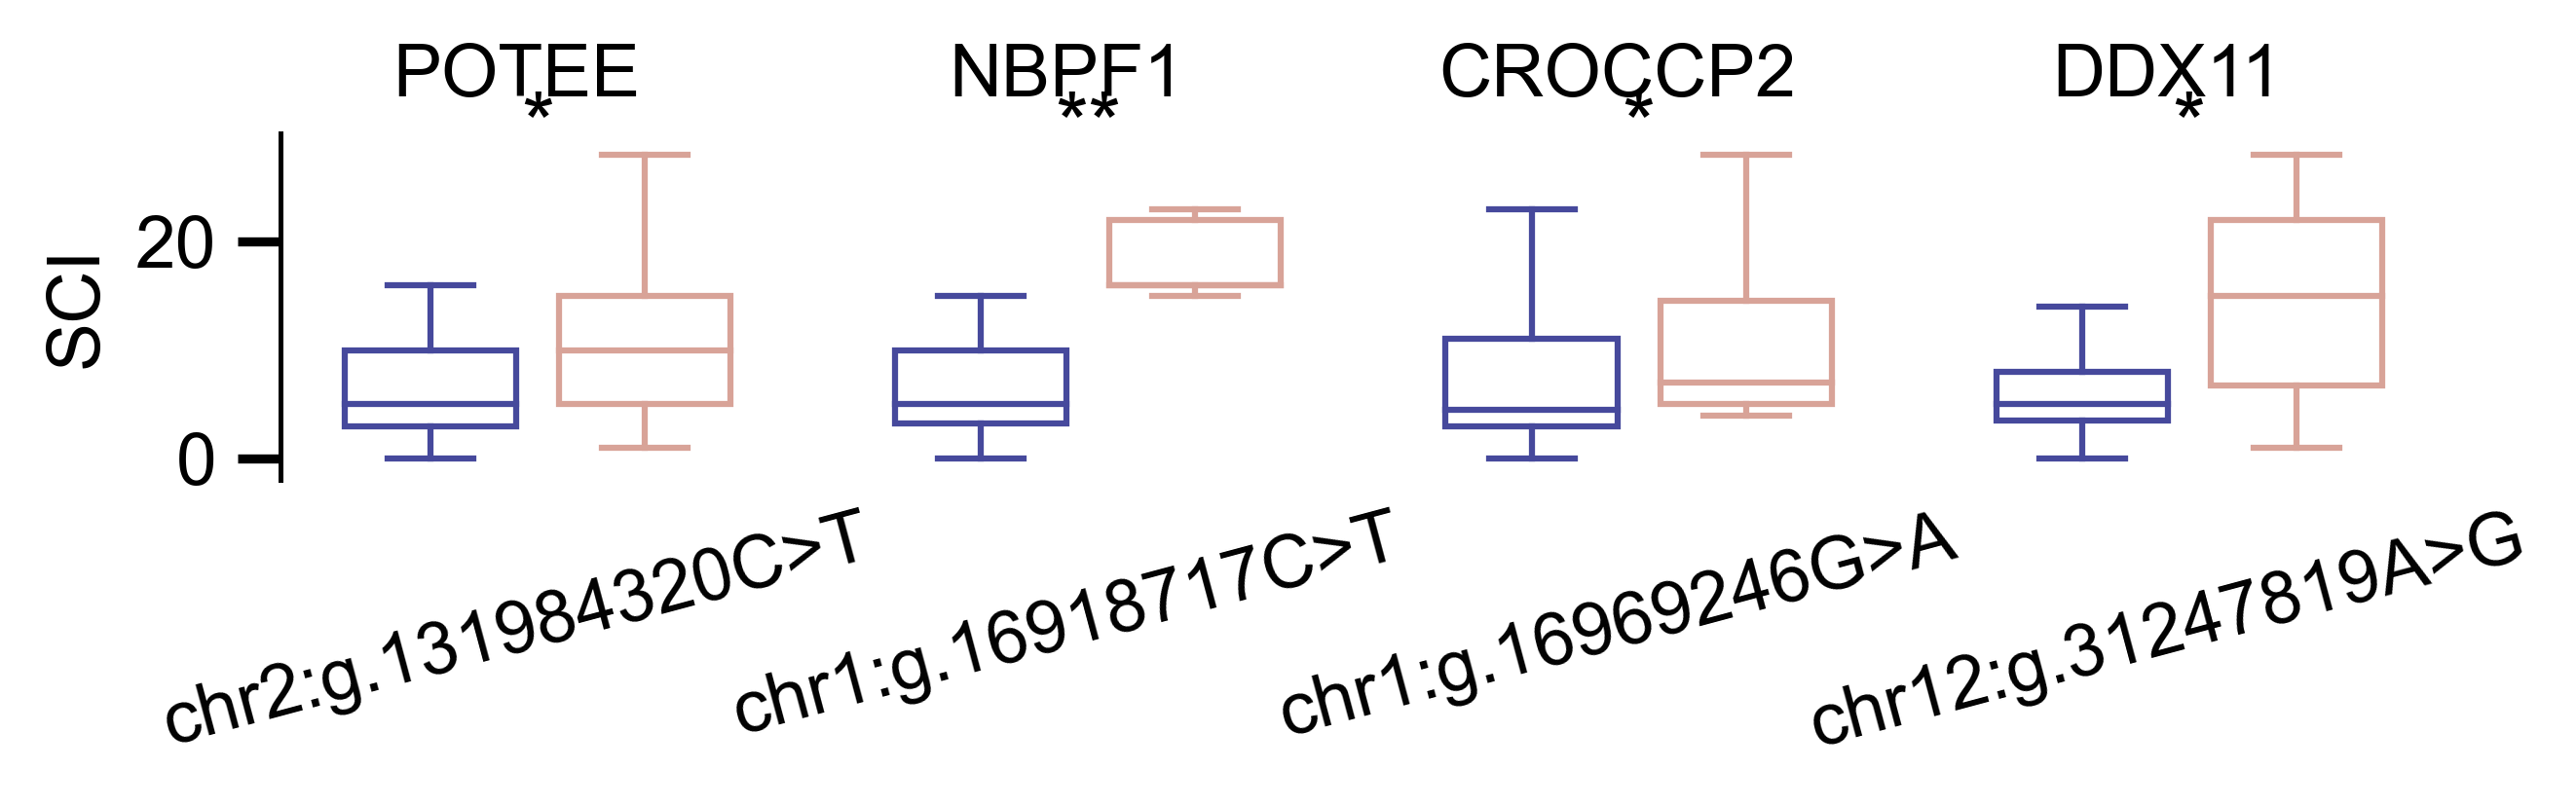

In [133]:
listA=result_list

plt.subplots(figsize=(7,2),dpi=450)
for j,i in enumerate([ 
 'chr2-131984320-131984320-C-T-POTEE',
 'chr1-16918717-16918717-C-T-NBPF1',
 'chr1-16969246-16969246-G-A-CROCCP2',
 'chr12-31247819-31247819-A-G-DDX11']
                      ):
    plt.subplot(1,5,j+1)
    plt.rcParams['font.family'] = 'Arial'
    colors=['grey','red']
    clsls=['nonmutant','mut']
    
    data=[ 
    targetdf[targetdf[ i ]=='nonmutant'][ 'Communication' ].dropna().tolist(),
    targetdf[targetdf[ i ]==      'mut'][ 'Communication' ].dropna().tolist(),
    ]
    colors =['#46499c','#d8a398']
    wkls1=[]
    wkls2=[]
    for num, d in enumerate(data):
        box=plt.boxplot(d, positions=[num + 1], widths=0.8, patch_artist=True,
                    boxprops=dict(facecolor='white',edgecolor =colors[num],linewidth=1),
                    medianprops=dict(color=colors[num],linewidth=1),
                    whiskerprops={'color': colors[num],'linewidth':1},
                    capprops={'color': colors[num],'linewidth':1},
                    flierprops=dict(marker='o', color='black', markersize=0))
        
        lower_whisker = box['whiskers'][0].get_ydata()[1]        upper_whisker = box['whiskers'][1].get_ydata()[1]        wkls1.append(lower_whisker)
        wkls2.append(upper_whisker)

    plt.ylim(np.min(wkls1)*0.9-0.1*np.max(wkls2),np.max(wkls2)*1.1)

    u_statistic, p_value = stats.mannwhitneyu(data[0],data[1])
    if p_value>0.05:
        star='n.s.'
    elif (p_value <=0.05) &(p_value >0.01):
        star='*'
    elif (p_value <=0.01) &(p_value >0.001):
        star='**'
    elif (p_value <=0.001) &(p_value >0.0001):
        star='***'
    else:
        star='****'
    plt.text(1.5,28, star, ha='center', fontsize=14)
    plt.title(i.split('-')[-1], fontsize=12)
    plt.xticks([])
    plt.xlim(0.3,len(clsls)+0.5)
    plt.ylim(-2,30)
    plt.tick_params(which='both', width=1.5, length=7, left=True, bottom=False)
    plt.xlabel(loci_dict[i], fontsize=12,rotation=15)
    plt.ylabel('SCI', fontsize=12)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    
    if j>0:
        plt.gca().spines['left'].set_visible(False)
        plt.yticks([])
        plt.ylabel('', fontsize=12)
plt.tight_layout()
plt.savefig('Fig2E2.pdf', bbox_inches='tight')
plt.show()

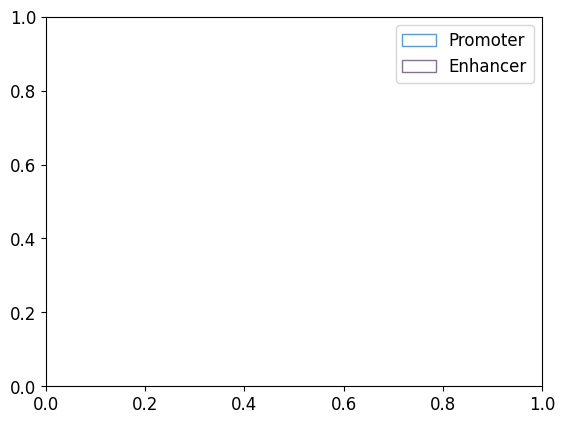

In [146]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots()

red_patch = mpatches.Patch(facecolor='white', edgecolor='#5a9ccb',label='Promoter')
blue_patch = mpatches.Patch(facecolor='white',edgecolor='#847195', label='Enhancer')

ax.legend(handles=[red_patch, blue_patch])

plt.show()


In [147]:
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42

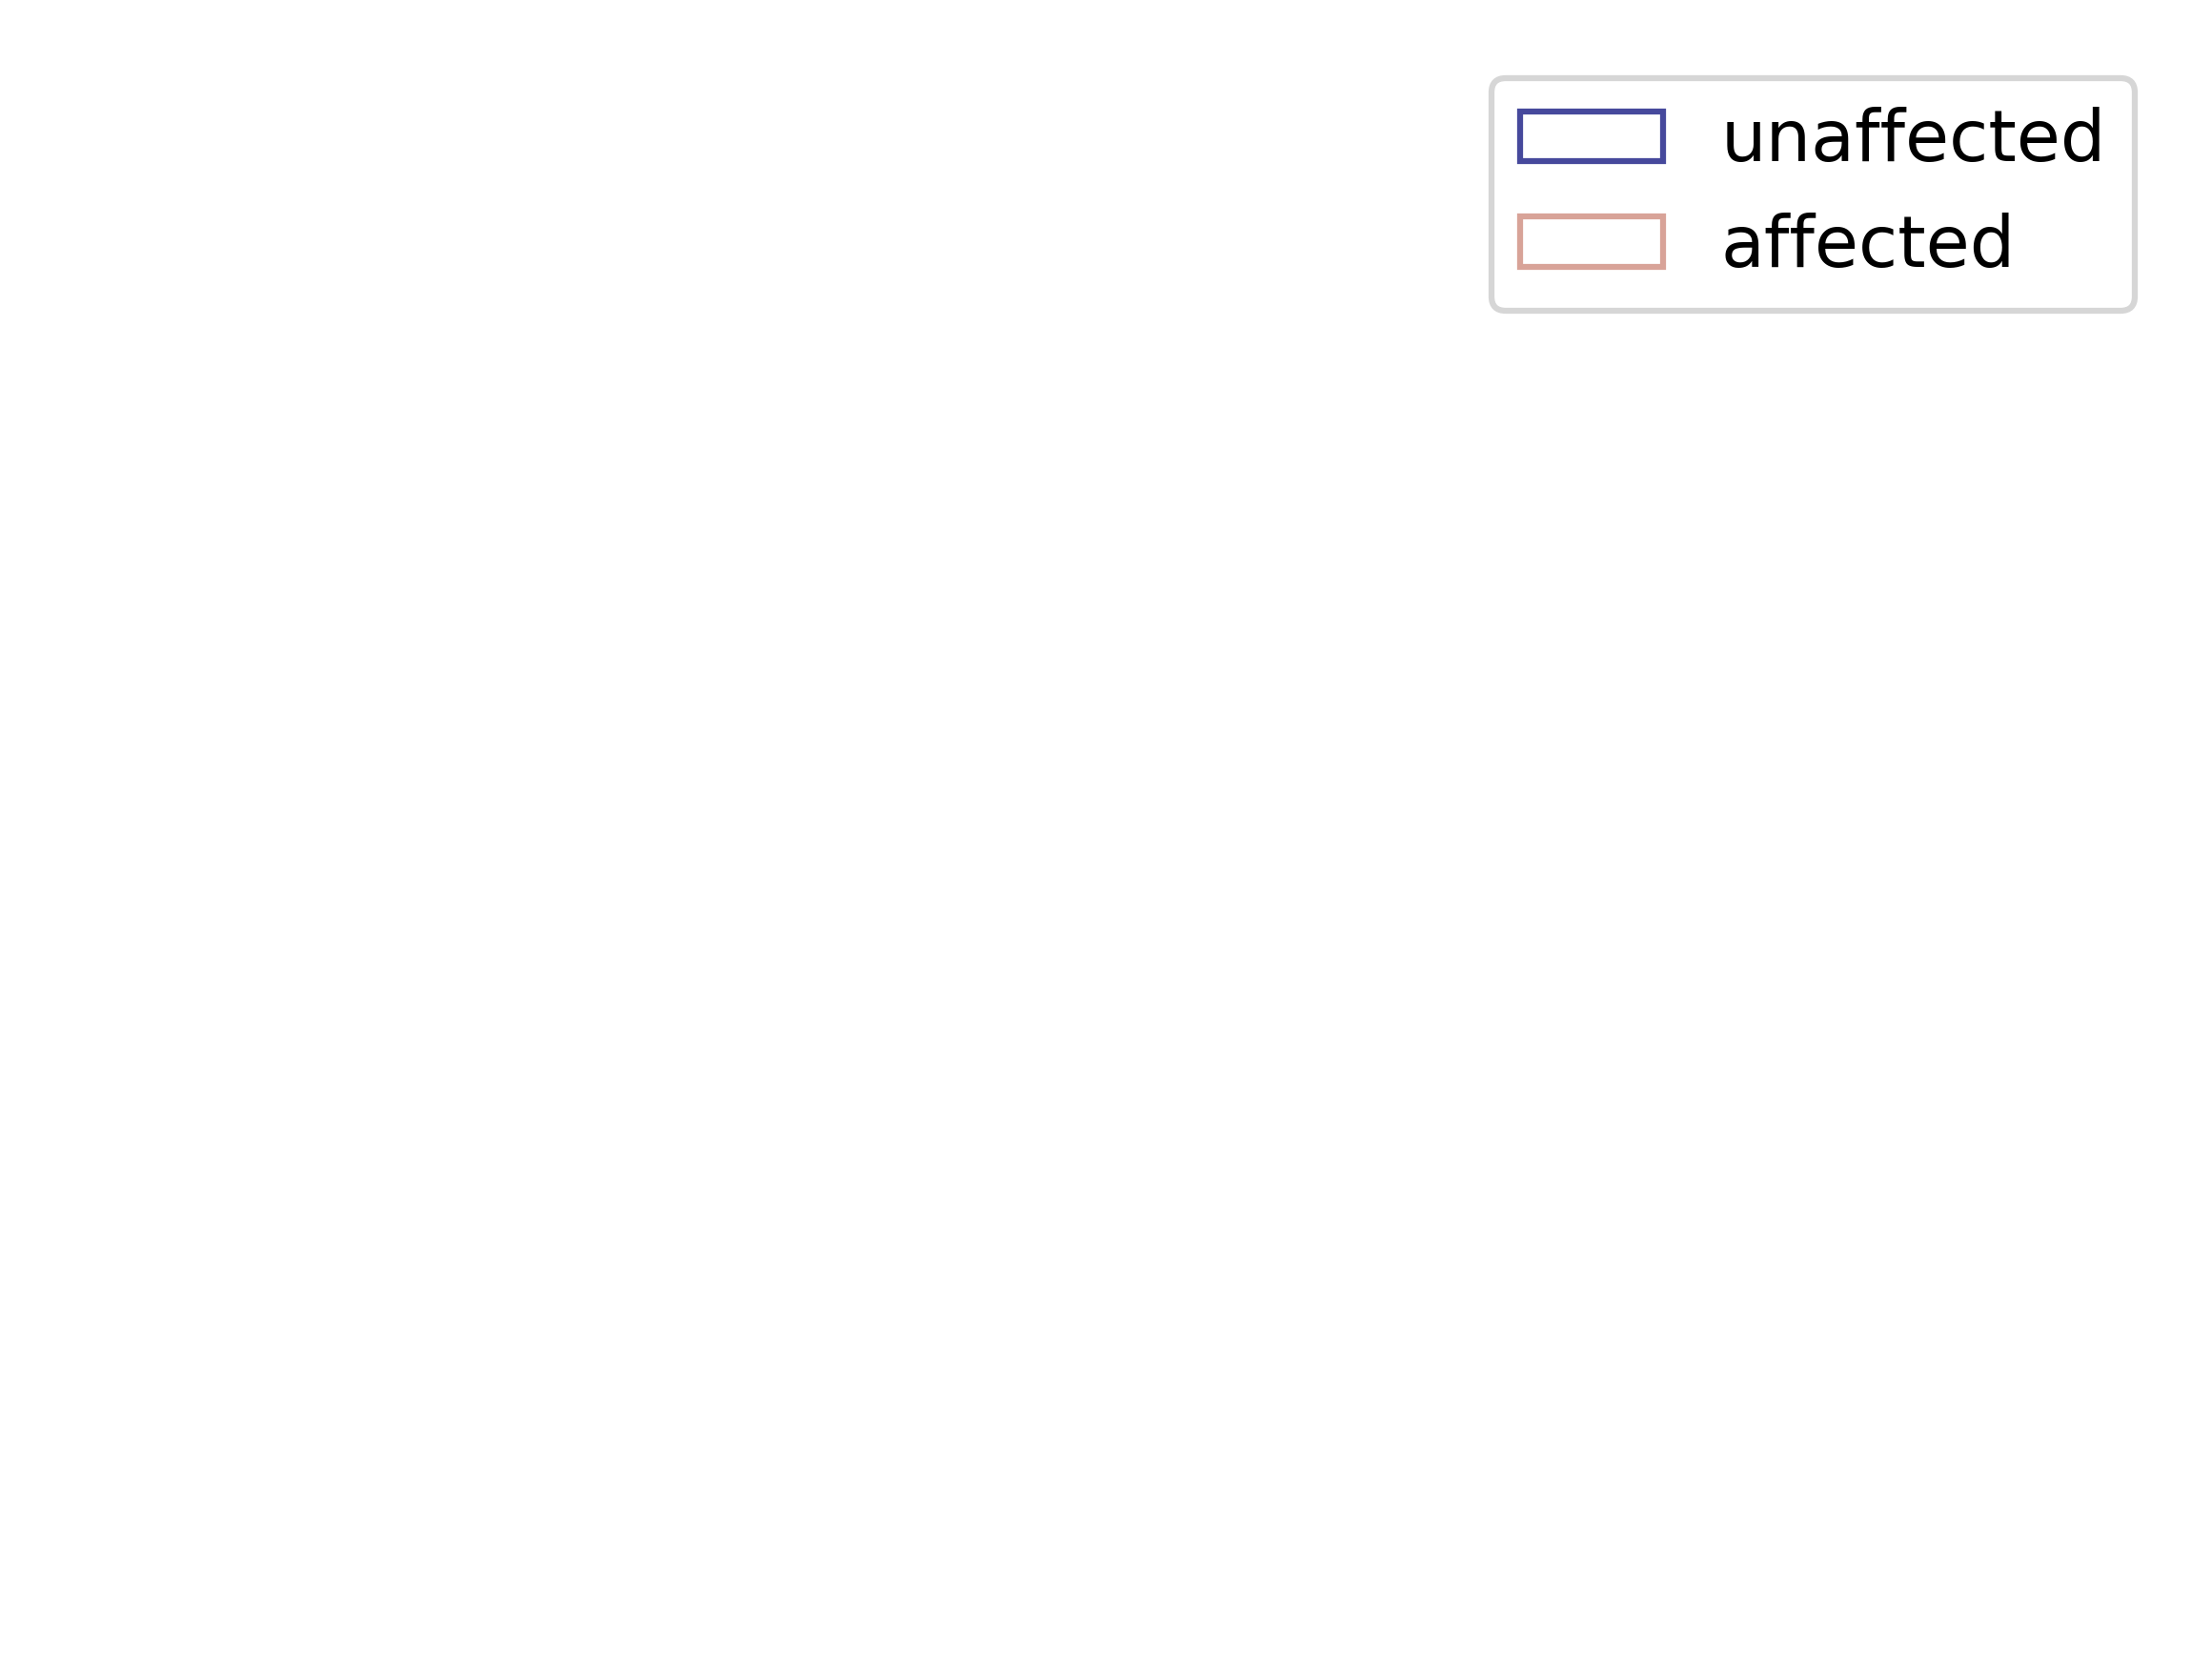

In [150]:
fig, ax = plt.subplots(dpi=450)
red_patch = mpatches.Patch(facecolor='white', edgecolor='#46499c',label='unaffected')
blue_patch = mpatches.Patch(facecolor='white',edgecolor='#d8a398', label='affected')

ax.legend(handles=[red_patch, blue_patch],ncol=1)
sns.despine(bottom=True,left=True)
plt.xticks([])
plt.yticks([])
plt.savefig('Fig2e3.pdf', bbox_inches='tight')
plt.show()